# Capstone EDA
By : Pythonic Minds

In [2]:
# Table of Contents  

In [4]:
## 1. Overview of the Project

### **a. Business Problems**
Home Credit aims to expand financial services to the unbanked population, where traditional credit history is limited or non-existent. To assess creditworthiness, they supplement loan applications with alternative data such as transaction records and telecom behavior.

The business objective is to predict the likelihood of loan default, where 0 indicates no default and 1 represents at least one late payment. Accurately predicting defaults will help Home Credit minimize losses and promote financial inclusion while ensuring responsible lending. This project aims to build a predictive model to assess clients' loan repayment ability using available data.

### **b. Analytical Methodology**
Default risk prediction will be generated using a supervised machine learning classification model. Historical loan application data will be split into two sets, 80% for training and 20% for test. A model will be built based on the trained dataset and test its performance on the test set. The model will analyze factors like applicant demographics, credit history, past loan performance and repayment behavior to predict the likeliness of clients’ default on loans.

### **c. Goal**
Reducing the likelihood of default: by identifying the main predictors that are positively and negatively correlated with it

## **2. Introduction**
The notebook begins by exploring the application_train.csv file, which contains key demographic information about the applicants, such as age, income, along with their credit history and other significant documents. Throughout the notebook, extensive data cleaning is performed to ensure the dataset is in optimal shape for analysis. Furthermore, the notebook focuses on identifying the most important predictors that influence the likelihood of defaulting. By carefully removing unnecessary rows and columns, the analysis reduces noise and enhances the model's overall efficiency

## 3. Importing Packages

In [497]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Loading Data

In [500]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# define the function for reducing memory usage when importing data
def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [502]:
#reading the csv file 
application_train_df = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/application_train.csv"))
bureau_df = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/bureau.csv"))
bureau_balance_df = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/bureau_balance.csv"))
credit_card_balance_df = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/credit_card_balance.csv"))
installments_payments_df = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/installments_payments.csv"))
POS_CASH_balance_df =  reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/POS_CASH_balance.csv"))
previous_application_df = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/previous_application.csv"))

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%


In [ ]:
application_test_df  = reduce_memory_usage(pd.read_csv("/Users/linhdo/Documents/University/University of Utah/Coursework/Spring 2025/Career Capstone/home-credit-default-risk/application_test.csv"))


## 5. Data Exploration
In this section, we will understand different features of the all the datasets.


In [504]:
#getting a summary statistics and shape of the application dataset
summary = application_train_df.describe()
display(summary)
print(application_train_df.shape)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.0,307511.000000,104582.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.0,306490.000000,306490.0,306490.000000,307510.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990259e+05,27108.572266,5.383961e+05,0.000000,-16036.995067,63815.045904,NaN,-2994.202373,NaN,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

(307511, 122)


In [506]:
#getting a summary statistics and shape of the bureau_df dataset
summary = bureau_df.describe()
display(summary)
print(bureau_df.shape)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1610875.0,1082775.0,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,NaN,NaN,3.825417e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229514e+03,3.791277e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,NaN,NaN,2.059873e+05,9.622391e-02,1.150277e+06,6.790749e+05,4.489665e+04,5.937519e+03,7.207473e+02,3.256556e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-42048.0,-42016.0,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1138.0,-1489.0,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-330.0,-897.0,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,474.0,-425.0,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,31200.0,0.0,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


(1716428, 17)


In [508]:
#getting a summary statistics and shape of the bureau_balance_df dataset
summary = bureau_balance_df.describe()
display(summary)
print(bureau_balance_df.shape)

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


(27299925, 3)


In [510]:
#getting a summary statistics and shape of the credit_card_balance_df dataset
summary = credit_card_balance_df.describe()
display(summary)
print(credit_card_balance_df.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3090496.0,3.840312e+06,3.090496e+06,3090496.0,3535076.0,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961323e+03,7.433390e+03,2.881696e+02,2.968804e+03,3.540206e+03,1.028054e+04,7.588856e+03,5.596585e+04,5.808884e+04,5.809825e+04,NaN,7.031439e-01,0.000000e+00,NaN,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.074641e+05,1.651457e+05,2.803397e+04,3.336682e+04,8.197021e+03,2.066321e+04,5.525350e+03,3.579142e+04,3.159429e+04,1.015177e+05,1.071769e+05,1.071802e+05,0.0,3.190347e+00,8.239746e-02,0.0,0.0,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,4.0,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,15.0,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.0,0.000000e+00,0.000000e+00,0.0,32.0,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289208e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,51.0,1.650000e+02,1.200000e+01,165.0,120.0,3.260000e+03,3.260000e+03


(3840312, 23)


In [511]:
#getting a summary statistics and shape of the installments_payments_df dataset
summary = installments_payments_df.describe()
display(summary)
print(installments_payments_df.shape)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,13605401.0,1.360540e+07,13605401.0,13602496.0,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,NaN,1.887090e+01,NaN,NaN,1.705092e+04,1.723821e+04
std,5.362029e+05,1.027183e+05,0.0,2.666407e+01,NaN,NaN,4.964295e+04,5.375981e+04
min,1.000001e+06,1.000010e+05,0.0,1.000000e+00,-2922.0,-4920.0,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.0,4.000000e+00,-1654.0,-1662.0,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.0,8.000000e+00,-818.0,-827.0,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.0,1.900000e+01,-361.0,-370.0,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,178.0,2.770000e+02,-1.0,-1.0,3.771488e+06,3.771488e+06


(13605401, 8)


In [512]:
#getting a summary statistics and shape of the POS_CASH_balance_df dataset
summary = POS_CASH_balance_df.describe()
display(summary)
print(POS_CASH_balance_df.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9975287.0,9975271.0,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,NaN,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,0.0,0.0,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.0,0.0,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,10.0,3.0,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,12.0,7.0,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,24.0,14.0,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,92.0,85.0,4.231000e+03,3.595000e+03


(10001358, 8)


In [514]:
#getting a summary statistics and shape of the previous_application_df dataset
summary = previous_application_df.describe()
display(summary)
print(previous_application_df.shape)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1297984.0,997149.000000,997149.000000,997149.000000,997149.000000,997149.00000,997149.0
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697401e+03,2.278472e+05,1.248418e+01,9.964675e-01,0.000000,0.188477,0.774902,-8.806797e+02,3.139511e+02,NaN,342209.781250,13826.266602,33767.769531,76582.406250,81992.34375,NaN
std,5.325980e+05,1.028148e+05,1.477696e+04,2.933005e+05,3.177837e+05,2.090572e+04,3.154605e+05,3.334028e+00,5.932963e-02,0.107788,0.087708,0.100952,7.790997e+02,7.127443e+03,0.0,88611.609375,72421.296875,106544.812500,150155.109375,152926.93750,0.0
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034790,0.373047,-2.922000e+03,-1.000000e+00,0.0,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.00000,0.0
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160767,0.715820,-1.300000e+03,-1.000000e+00,6.0,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.00000,0.0
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189087,0.834961,-5.810000e+02,3.000000e+00,12.0,365243.000000,-831.000000,-361.000000,-537.000000,-499.00000,0.0
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108887,0.193359,0.852539,-2.800000e+02,8.200000e+01,24.0,365243.000000,-411.000000,129.000000,-74.000000,-44.00000,1.0
max,2.845382e+06,4.562550e+05,4.180582e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,84.0,365243.000000,365243.000000,365243.000000,365243.000000,365243.00000,1.0


(1670214, 37)


In [515]:
### a. Exploring Target Variable

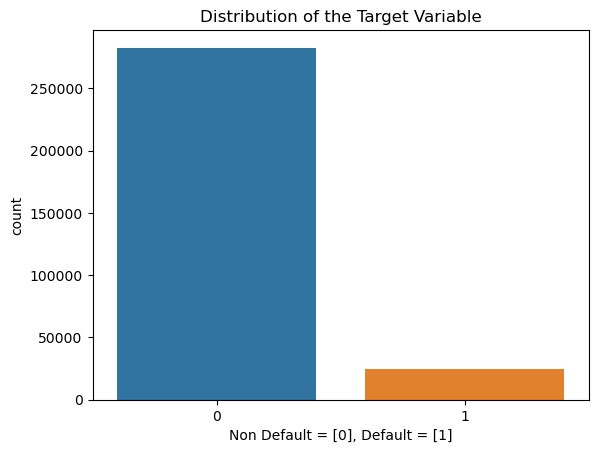

In [516]:
sns.countplot(x = application_train_df['TARGET'])
plt.title('Distribution of the Target Variable')
plt.xlabel('Non Default = [0], Default = [1]')
plt.show()

In [517]:
# Obtaining Target variable proportion
target_prop = round(application_train_df.value_counts(subset='TARGET', normalize=True),2)
print(target_prop)

print(f'The proportion of Non Defaulters [0] is {target_prop[0]}')
print(f'The proportion of Defaulters [1] is {target_prop[1]} ')


TARGET
0    0.92
1    0.08
Name: proportion, dtype: float64
The proportion of Non Defaulters [0] is 0.92
The proportion of Defaulters [1] is 0.08 


Data Description:
It appears we have a higher proportion of clients not having payment difficulties on loans compared to clients that have payment difficulties.
The above countplot illustrates this with a proportion of 92% for non default compared to 8% for default.

Additionally we have roughly 300,000 rows of data on the Train set with 122 columns
Whereas we have 48,000 rows of data on the Test set with 121 columns (as it excludes the Target variable)

In [519]:
### b. Plots

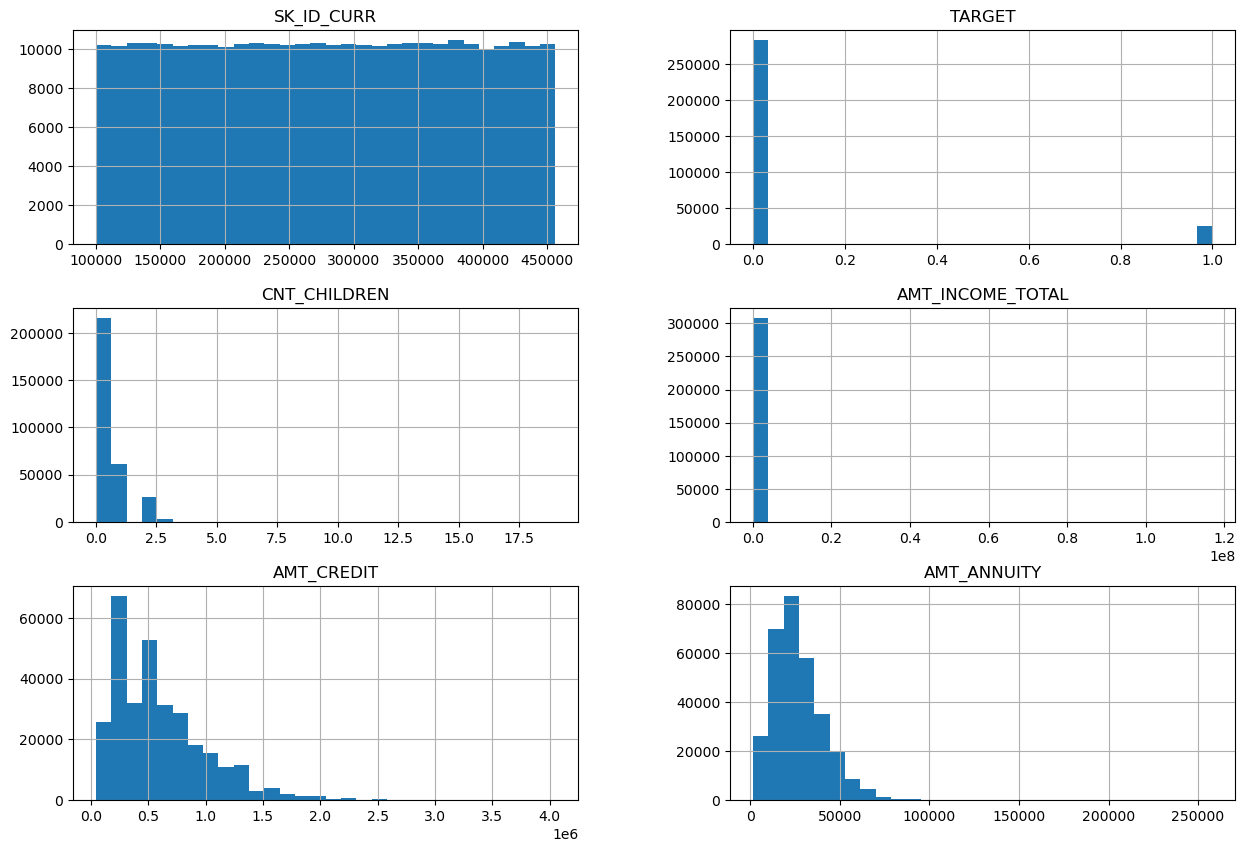

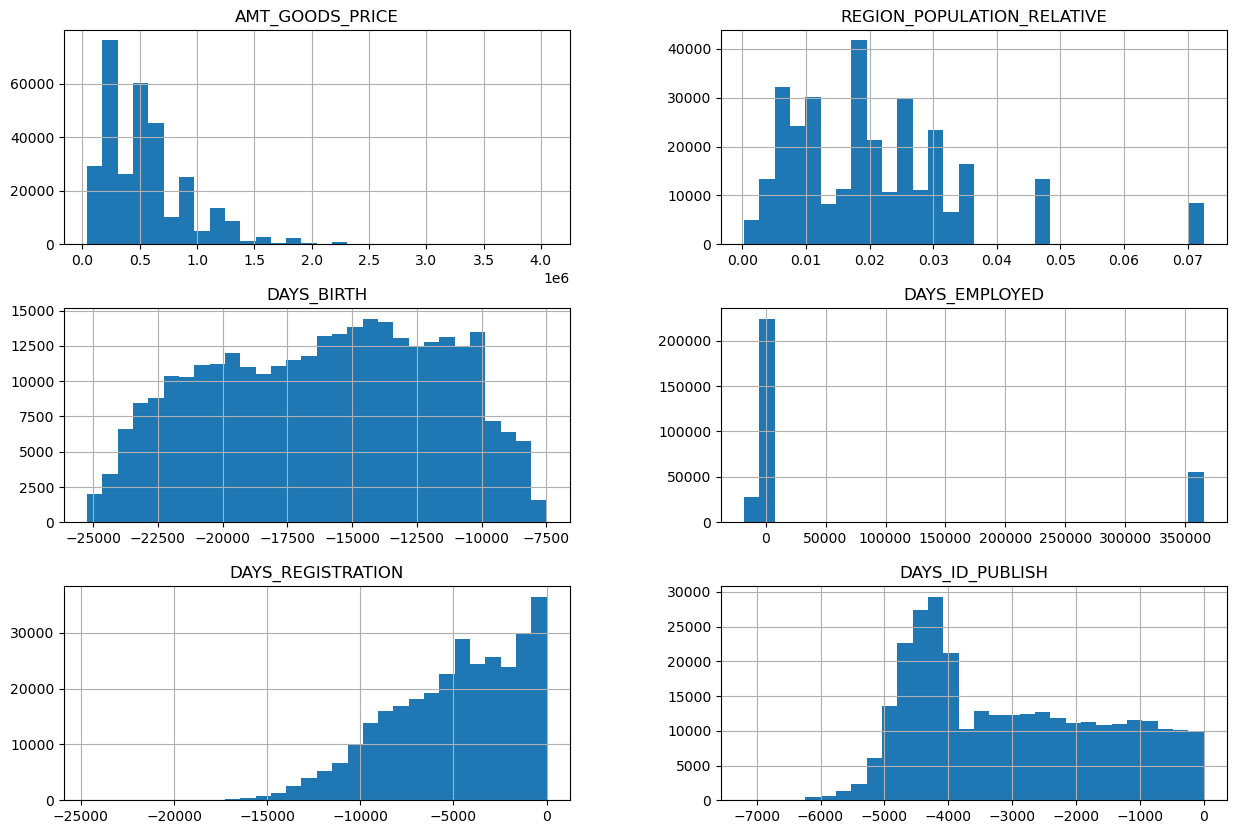

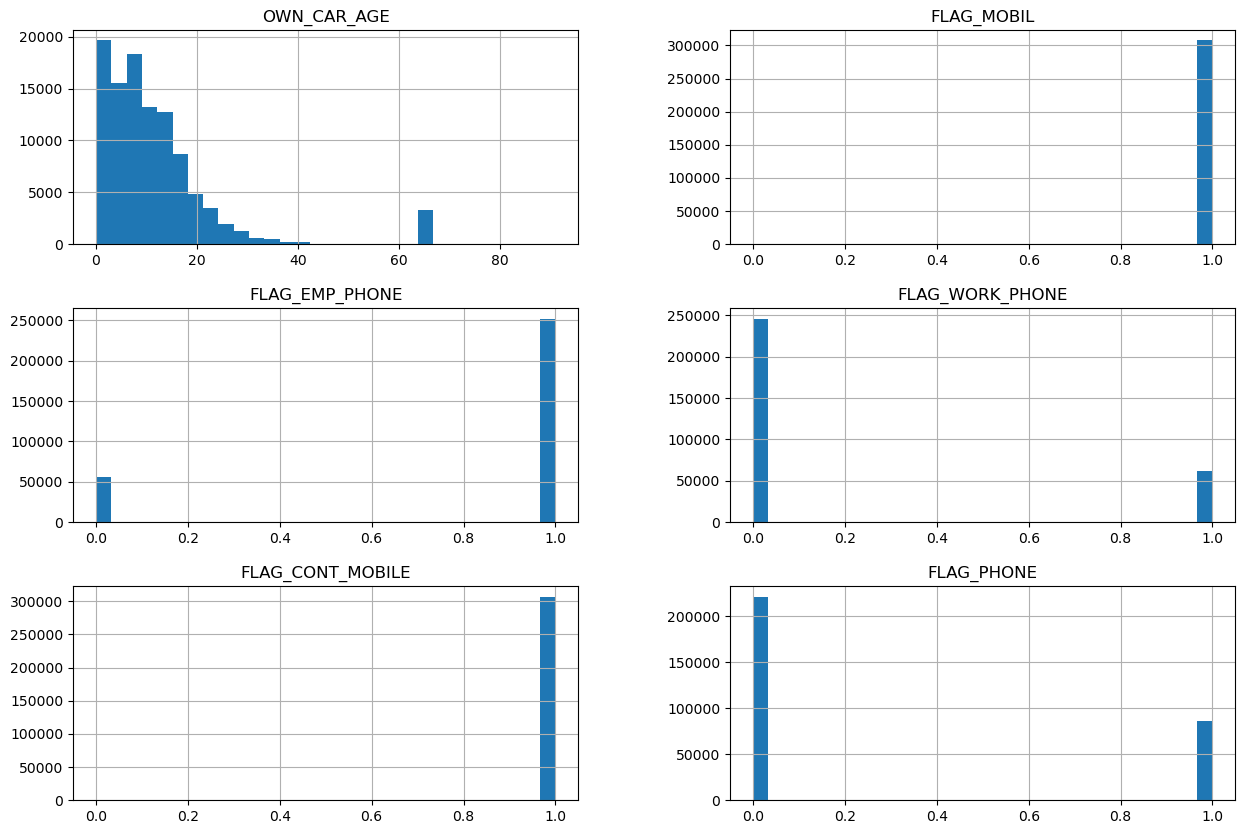

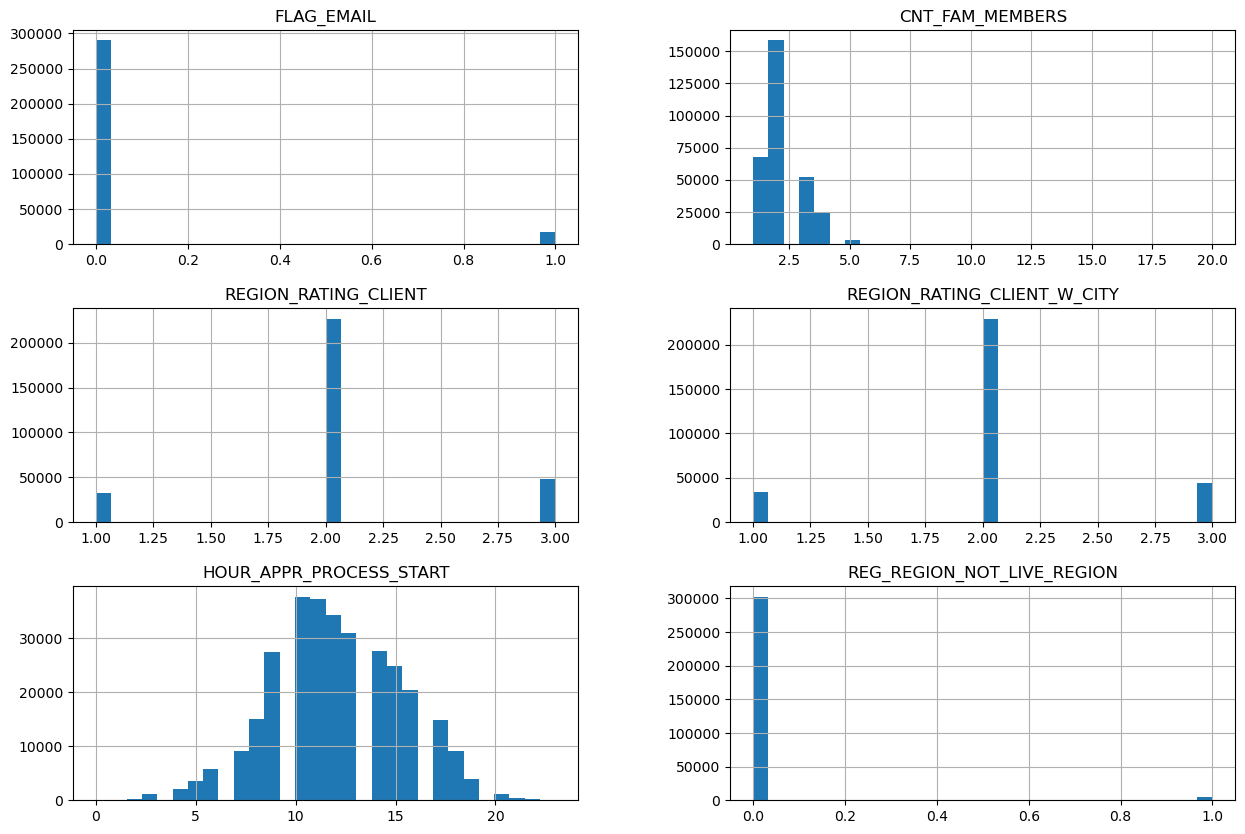

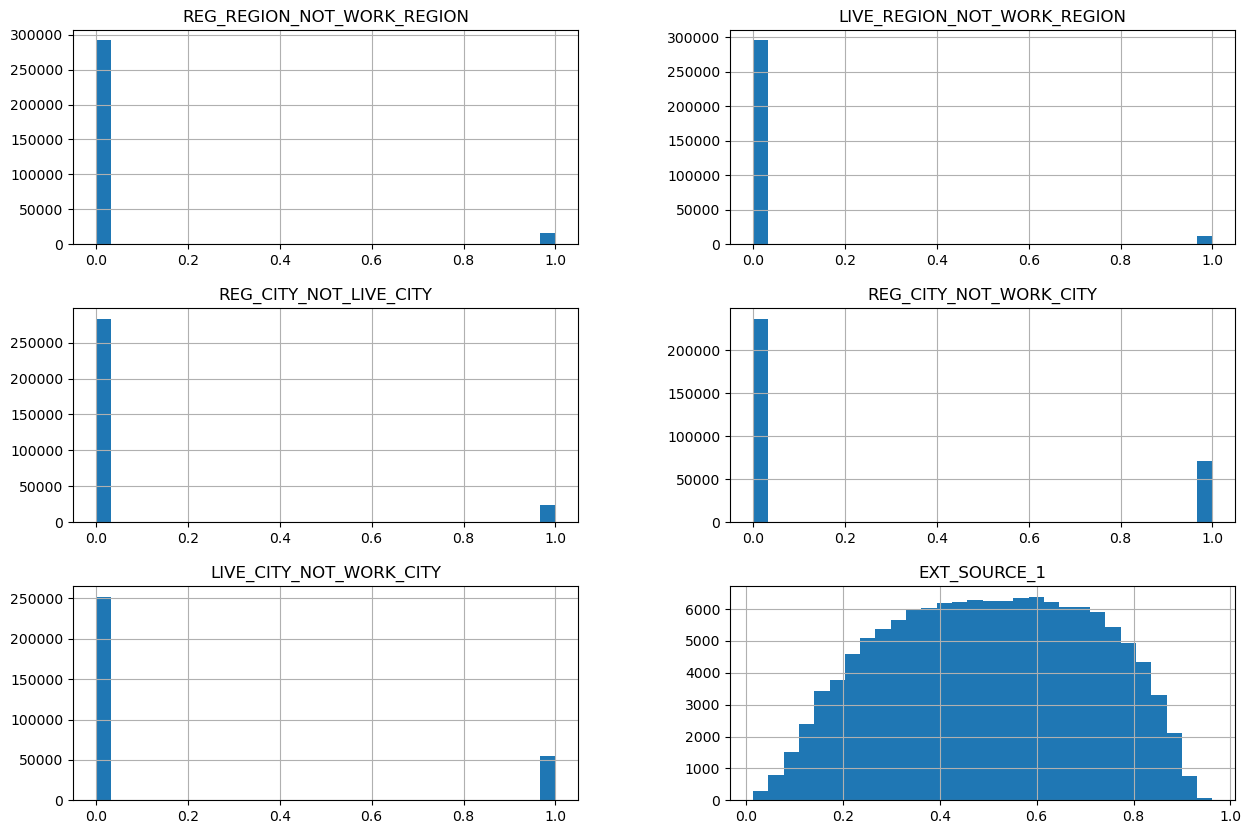

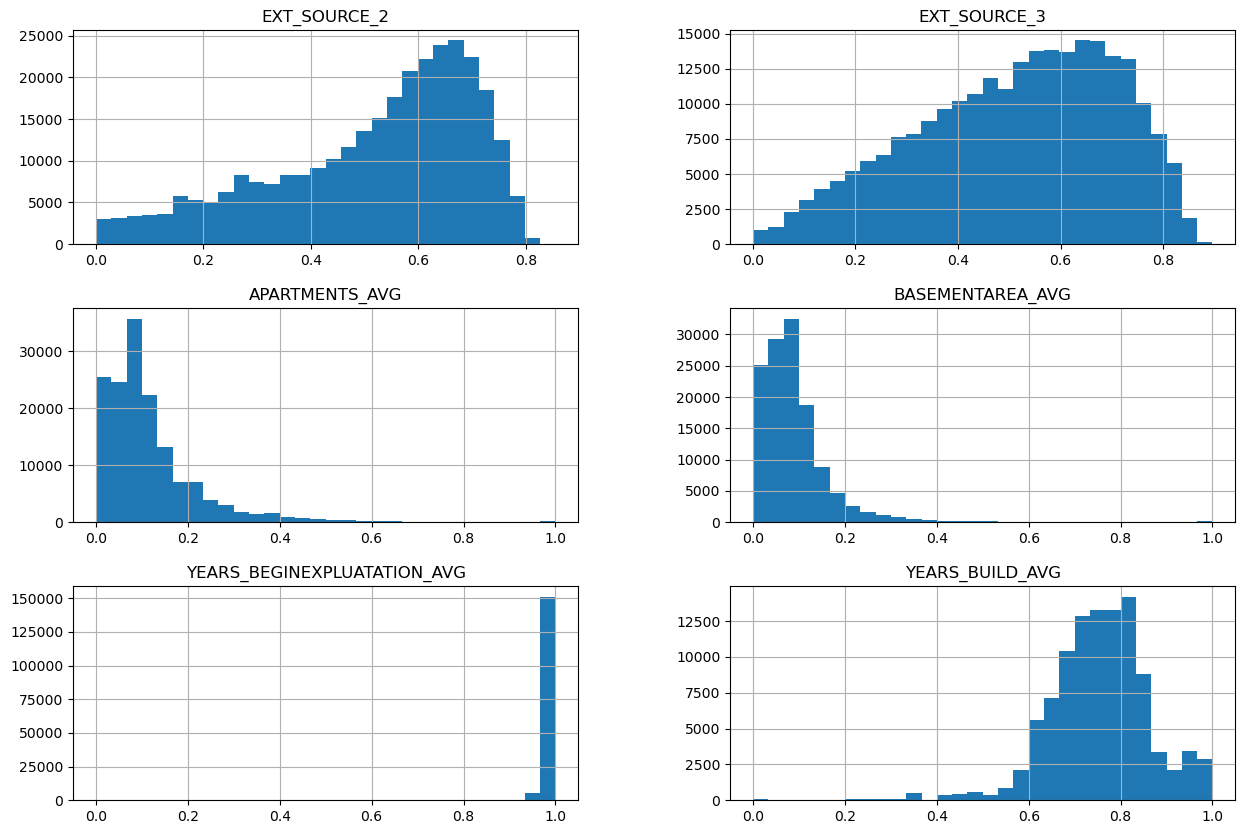

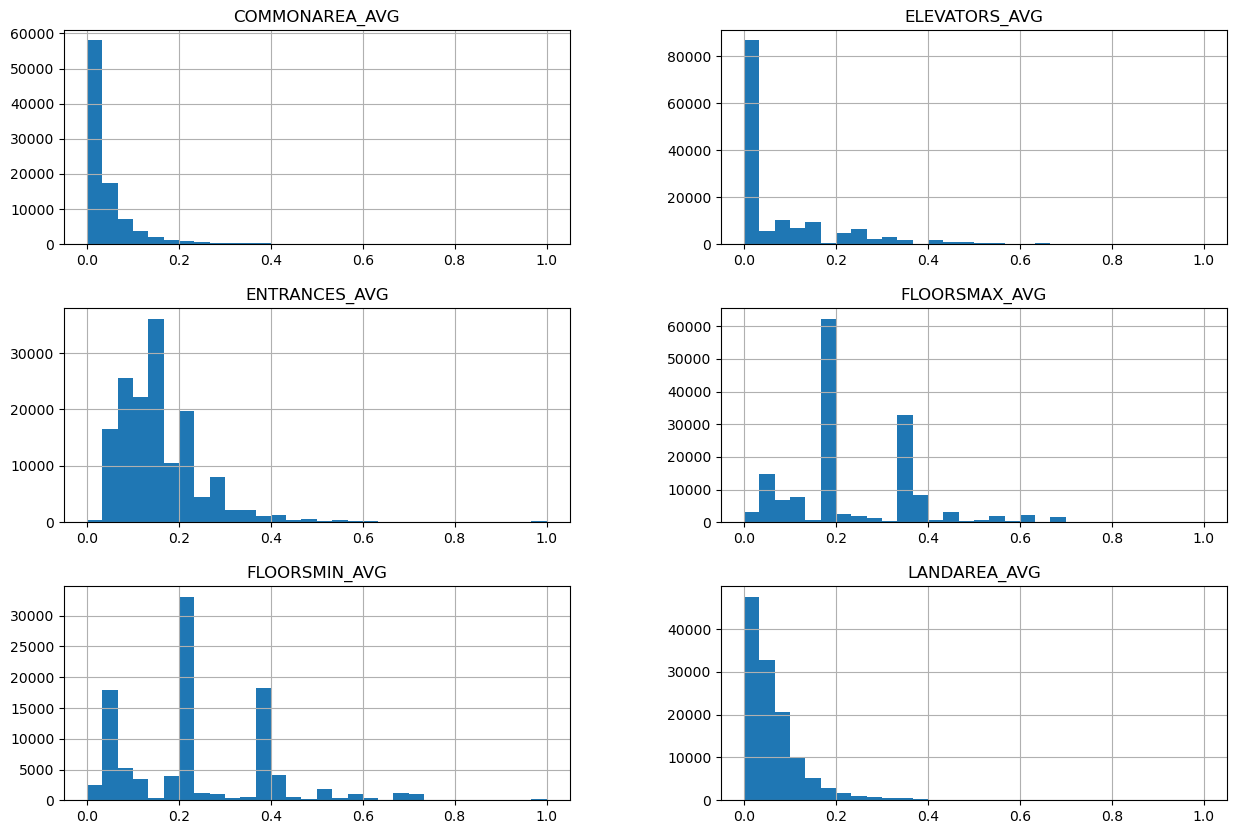

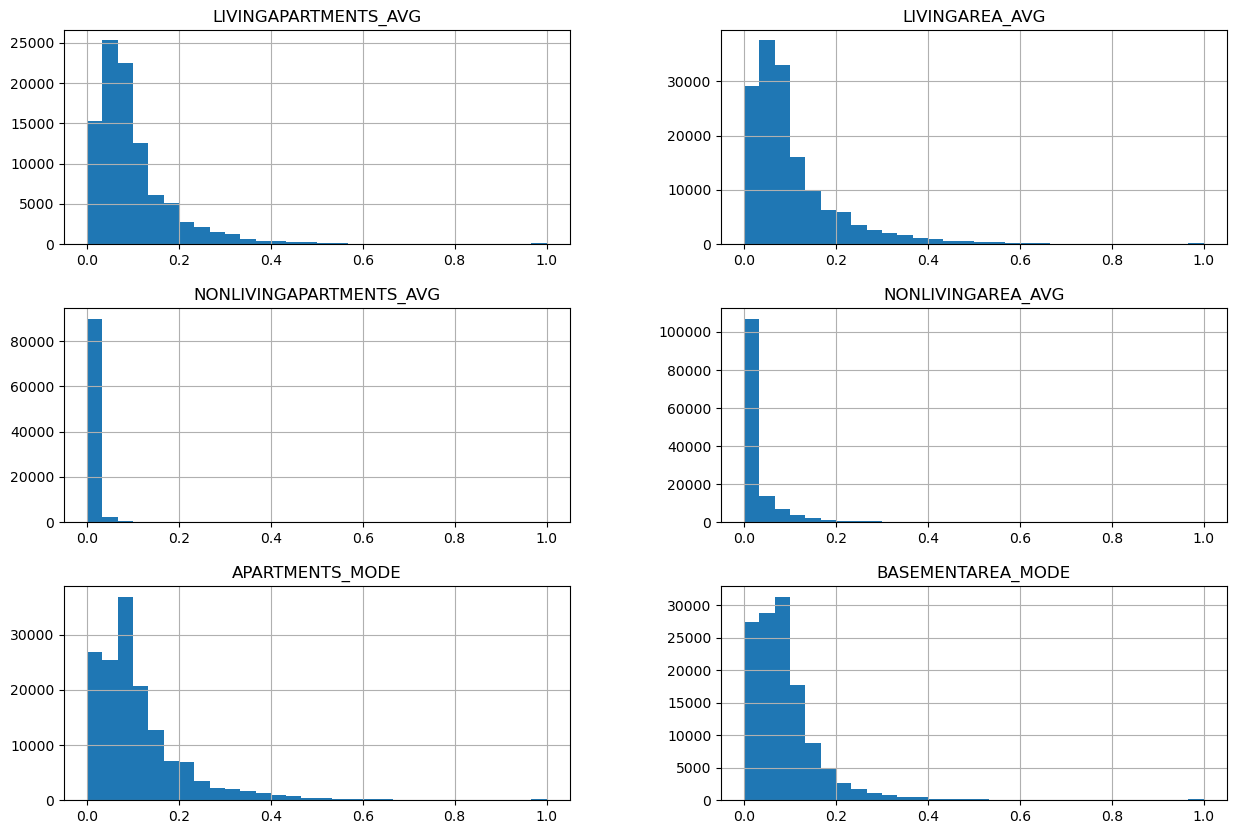

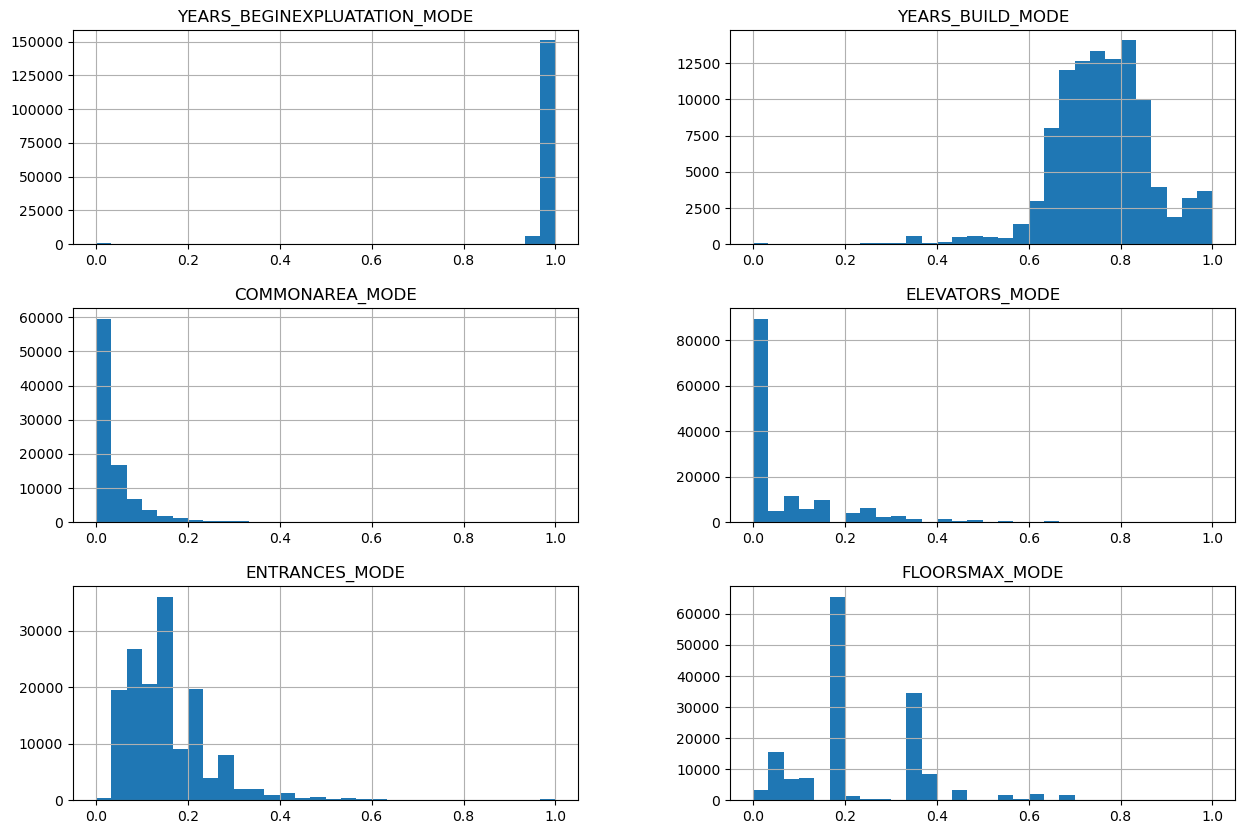

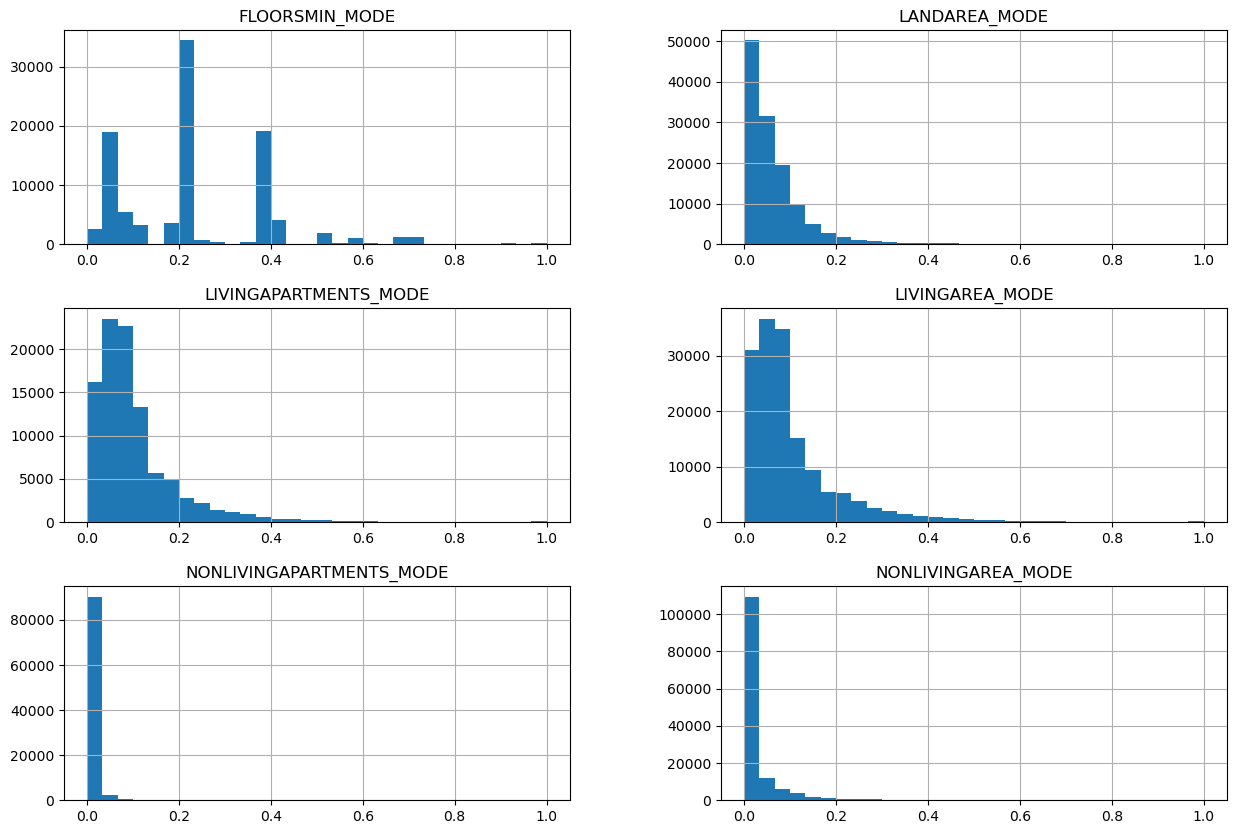

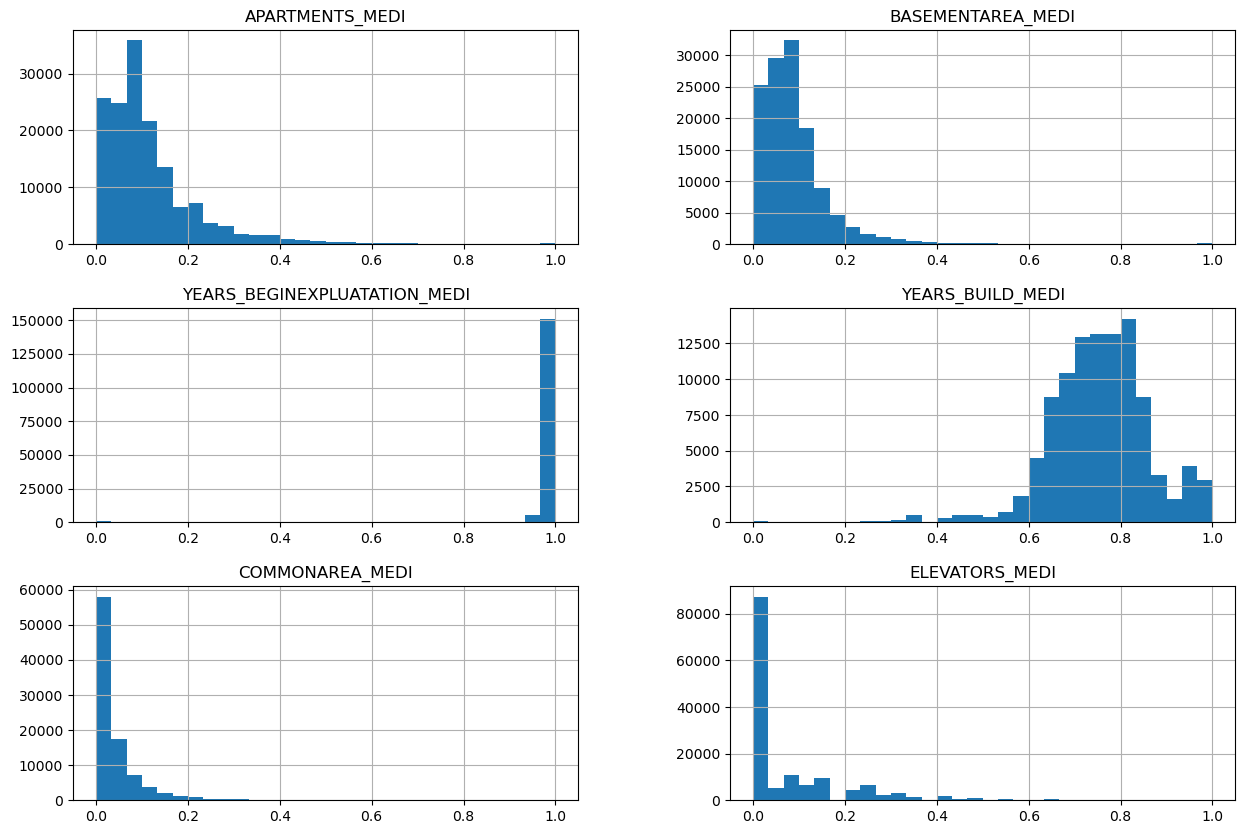

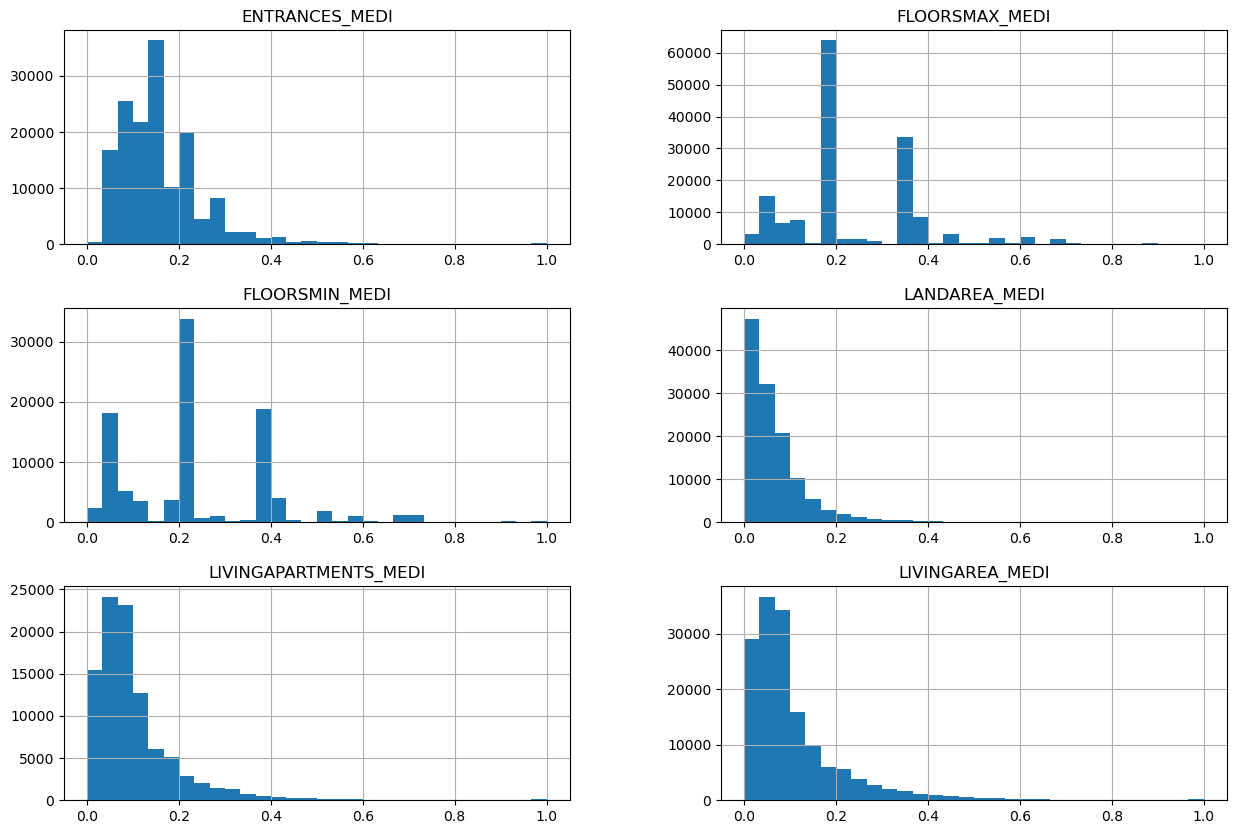

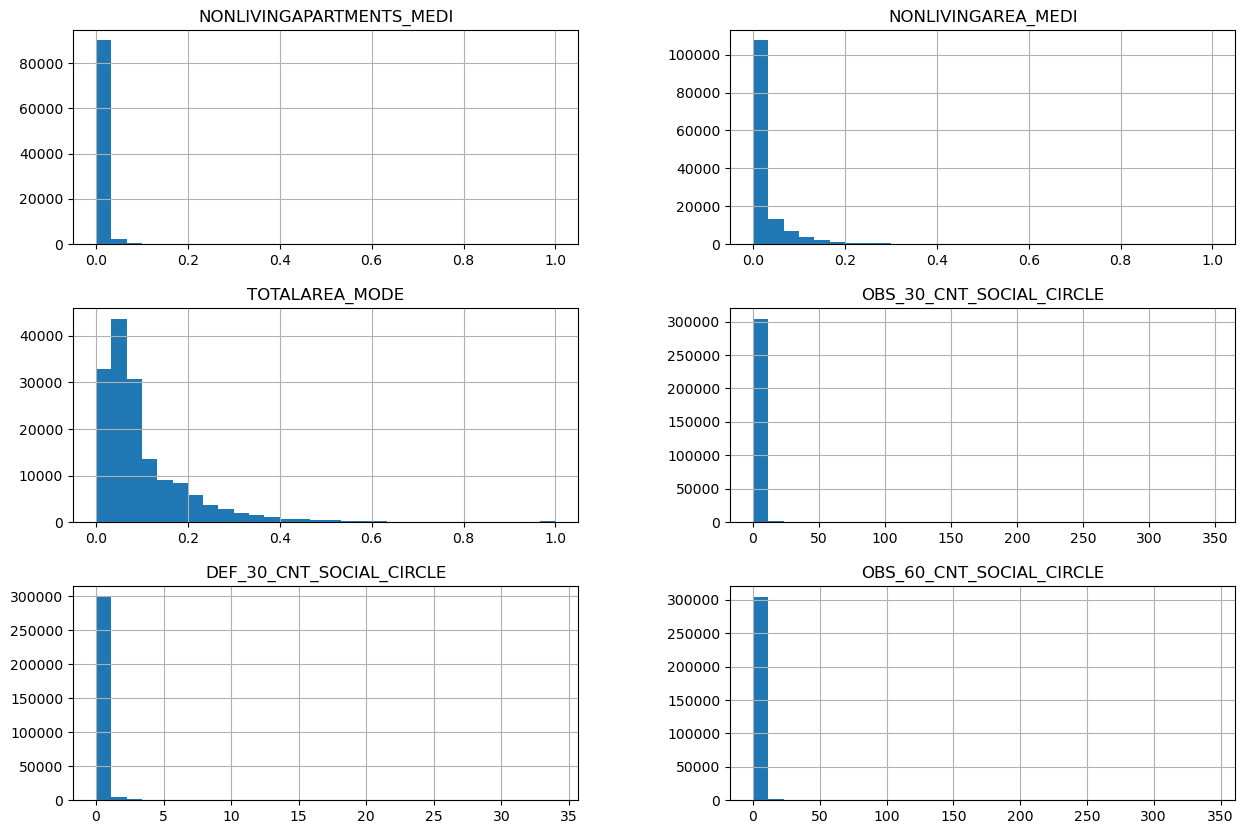

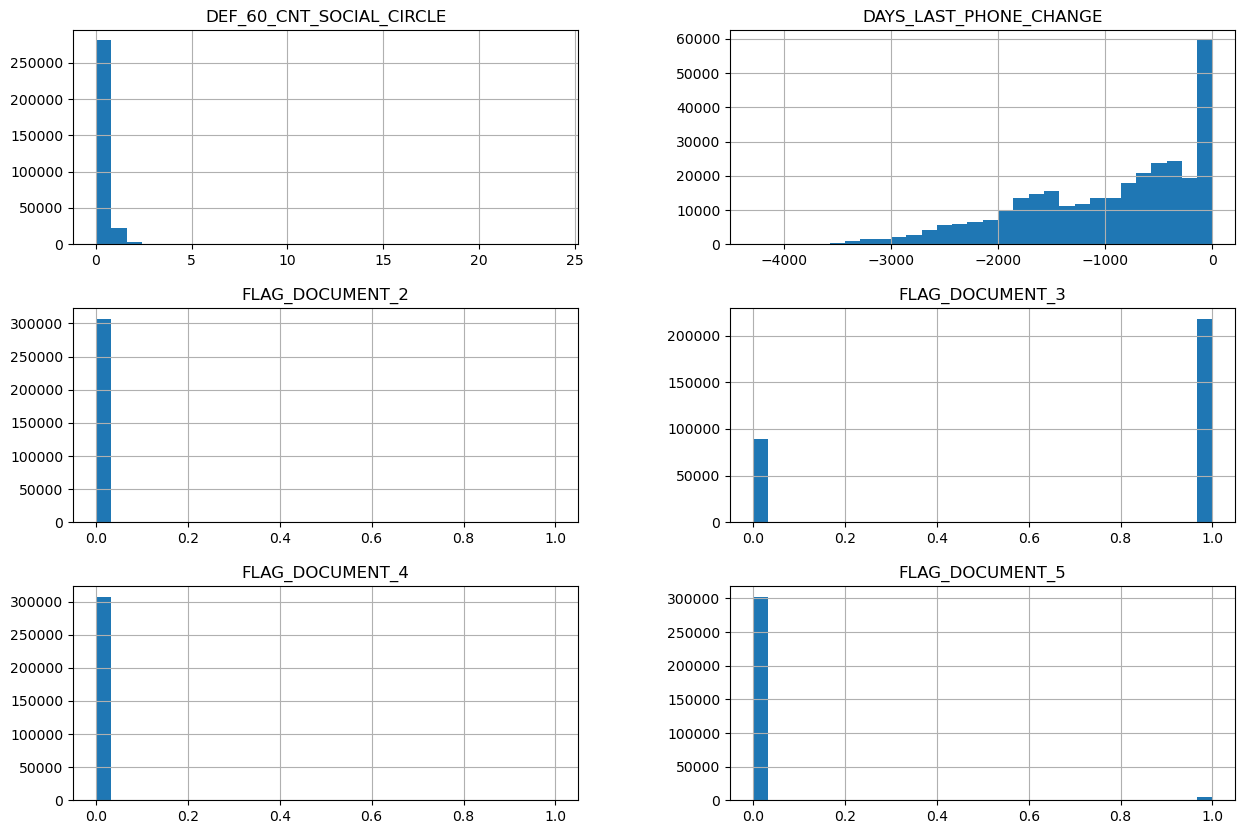

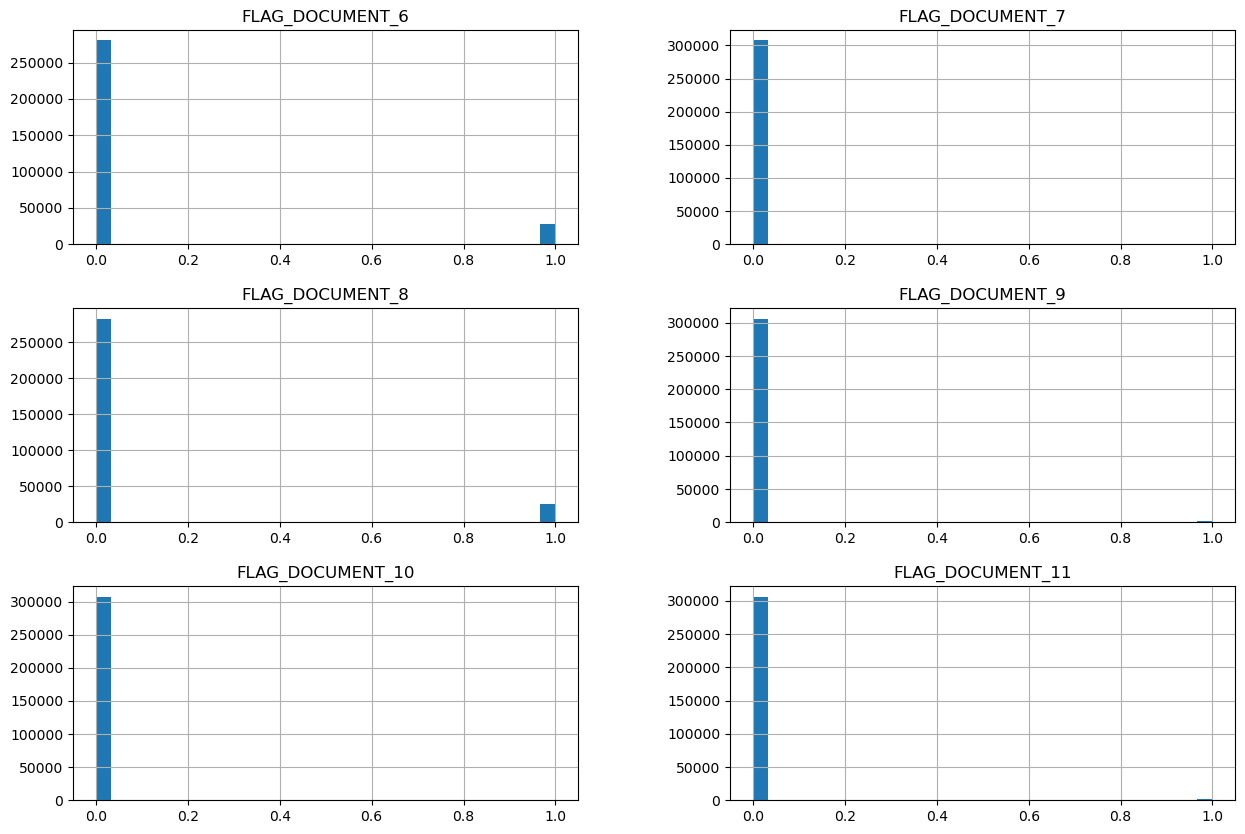

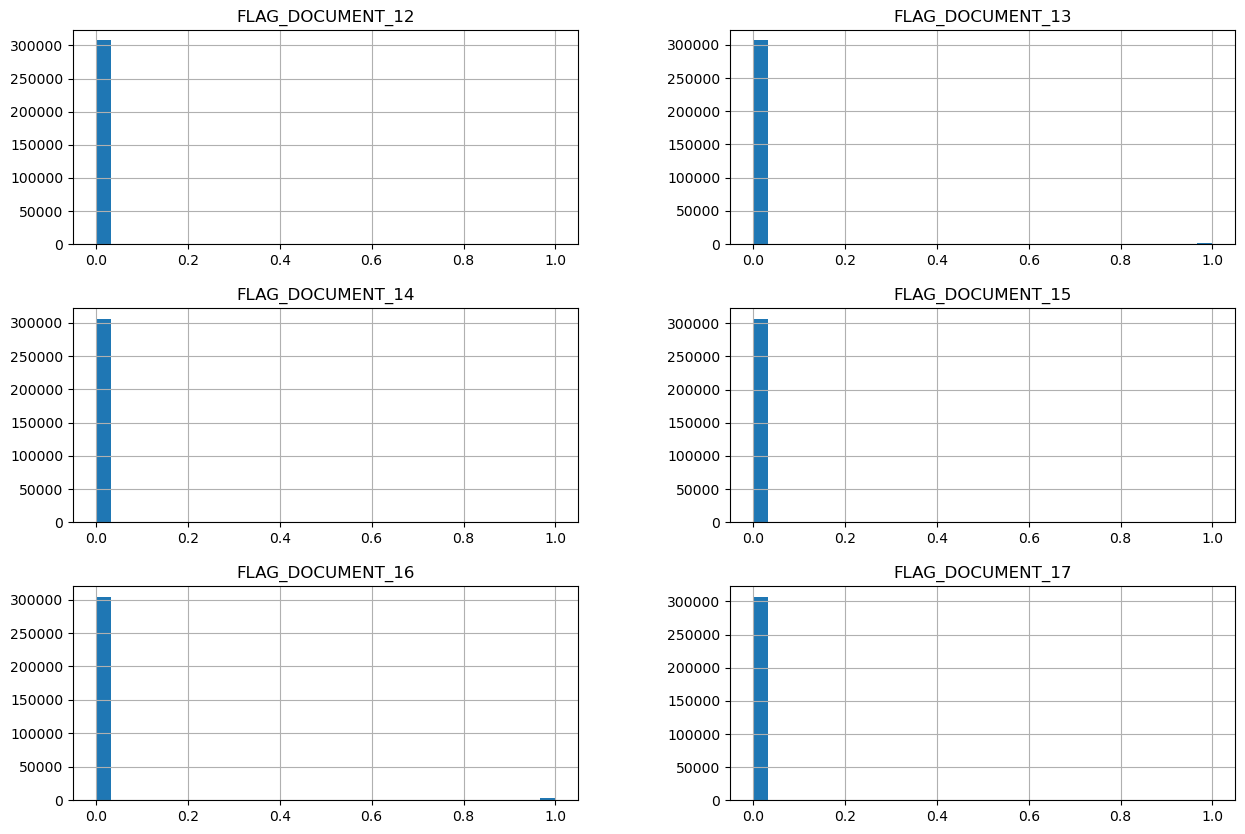

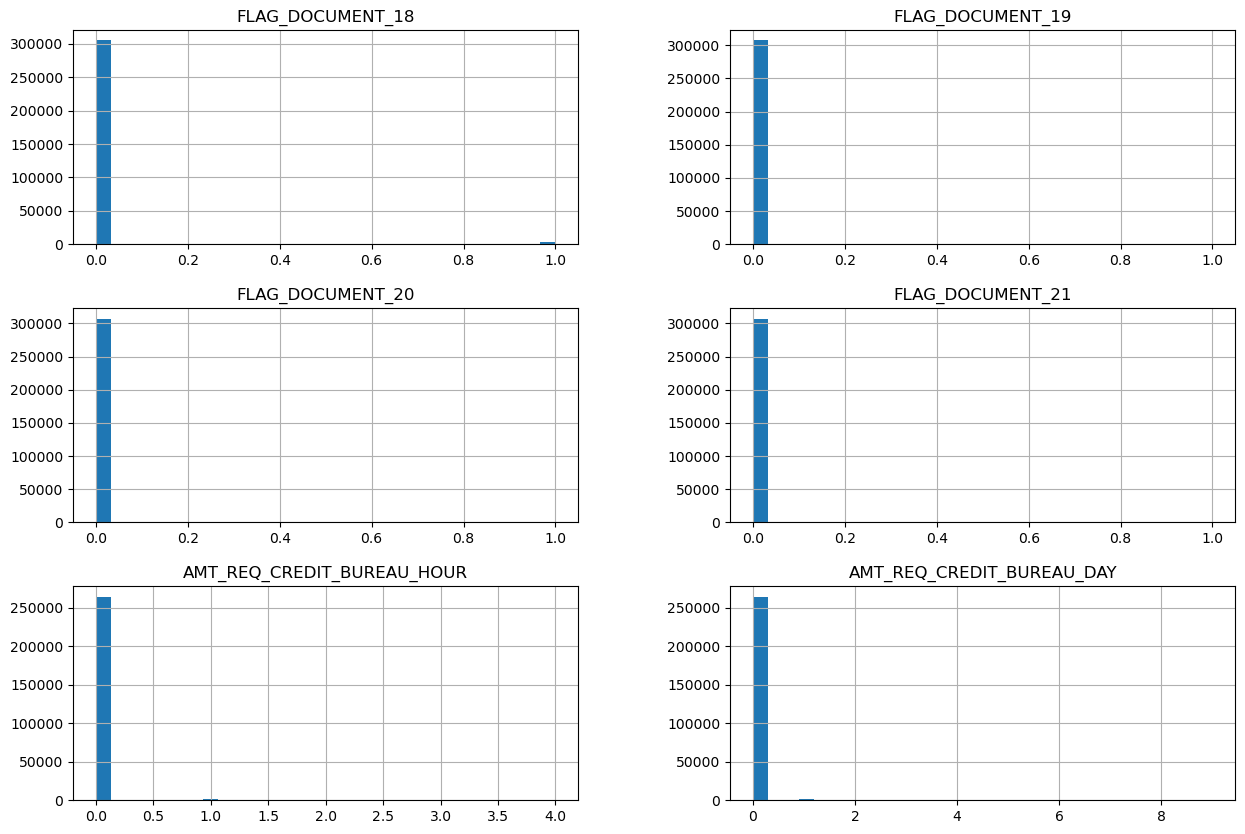

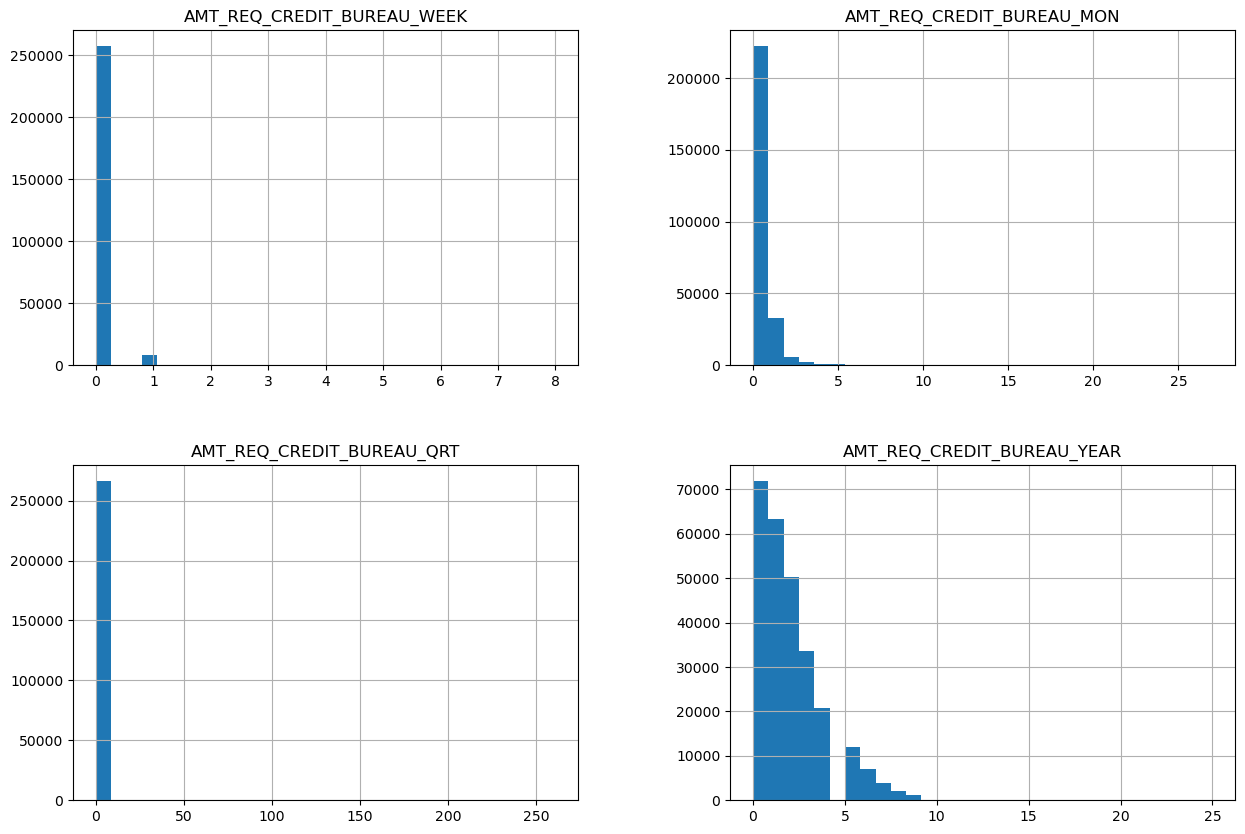

In [520]:
# Plot distribution on numerical columns
# Select numerical columns
num_cols = application_train_df.select_dtypes(include=['number']).columns

# Define batch size for better visualization
batch_size = 6  
num_batches = int(np.ceil(len(num_cols) / batch_size))

# Plot in smaller groups
for i in range(num_batches):
    batch_cols = num_cols[i * batch_size:(i + 1) * batch_size]
    application_train_df[batch_cols].hist(figsize=(15, 10), bins=30)
    plt.show()


Since the following features have low variations, we can remove them from our analysis:

1. FLAG DOCUMENT 13
2. FLAG DOCUMENT 16

In [522]:
# drop FLAG DOCUMENT 13 and 16
application_train_df = application_train_df.drop(columns=['FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16'])

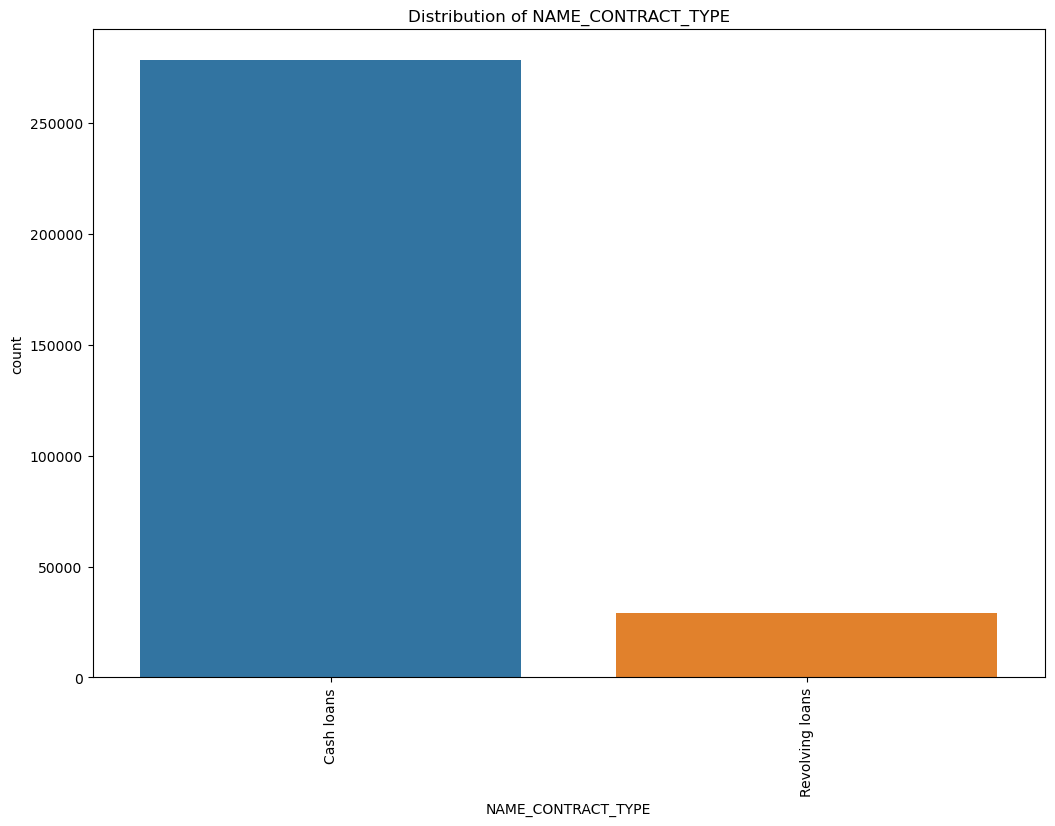

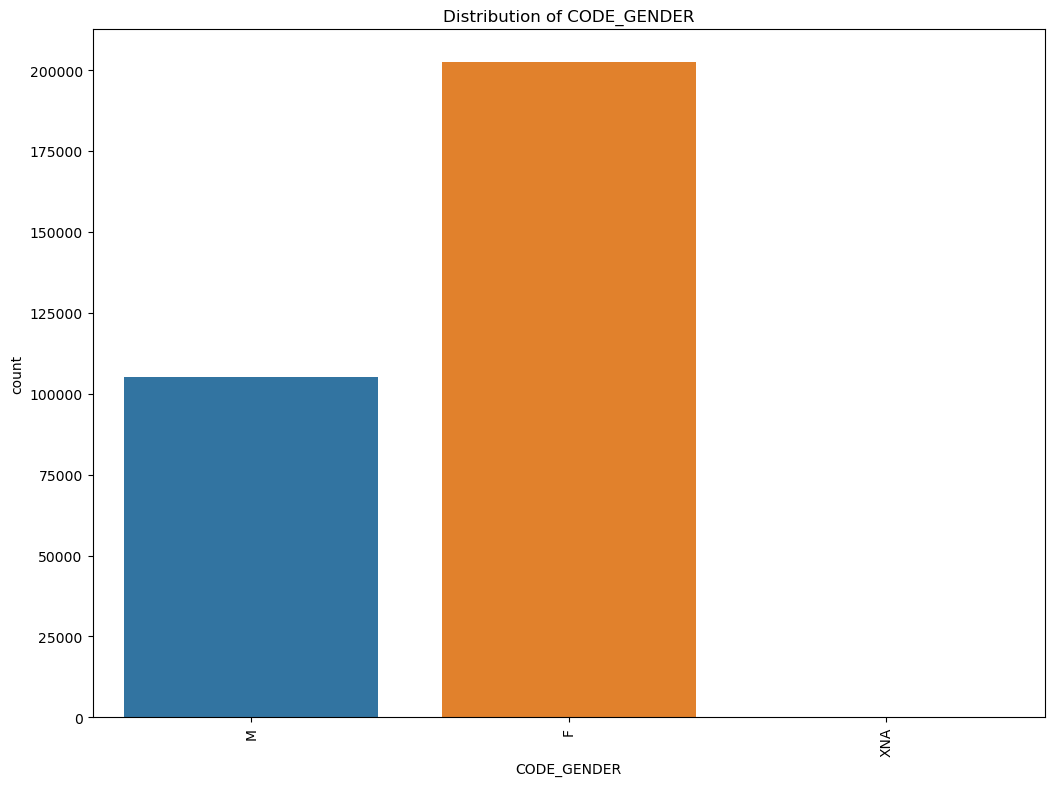

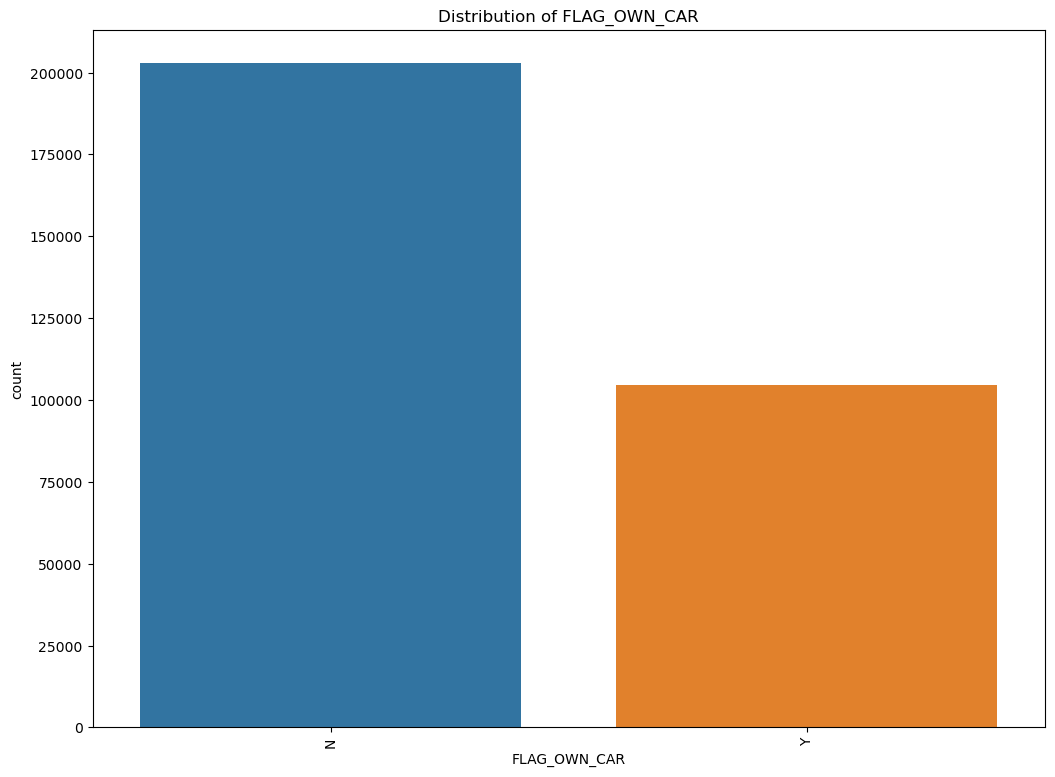

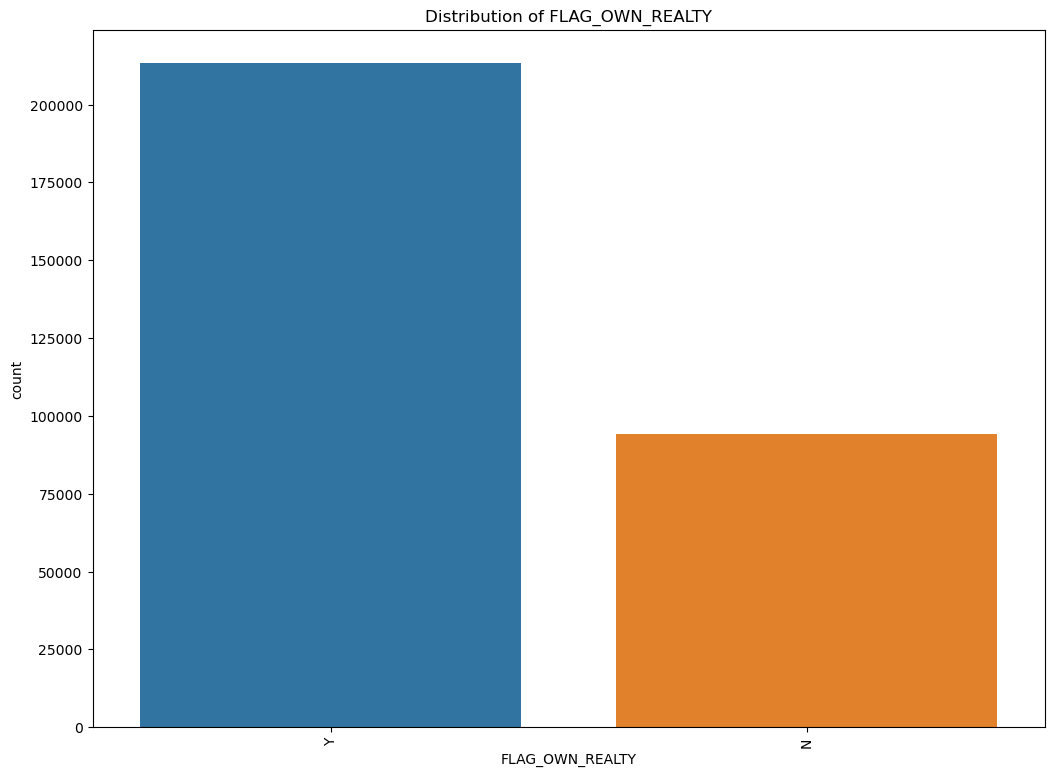

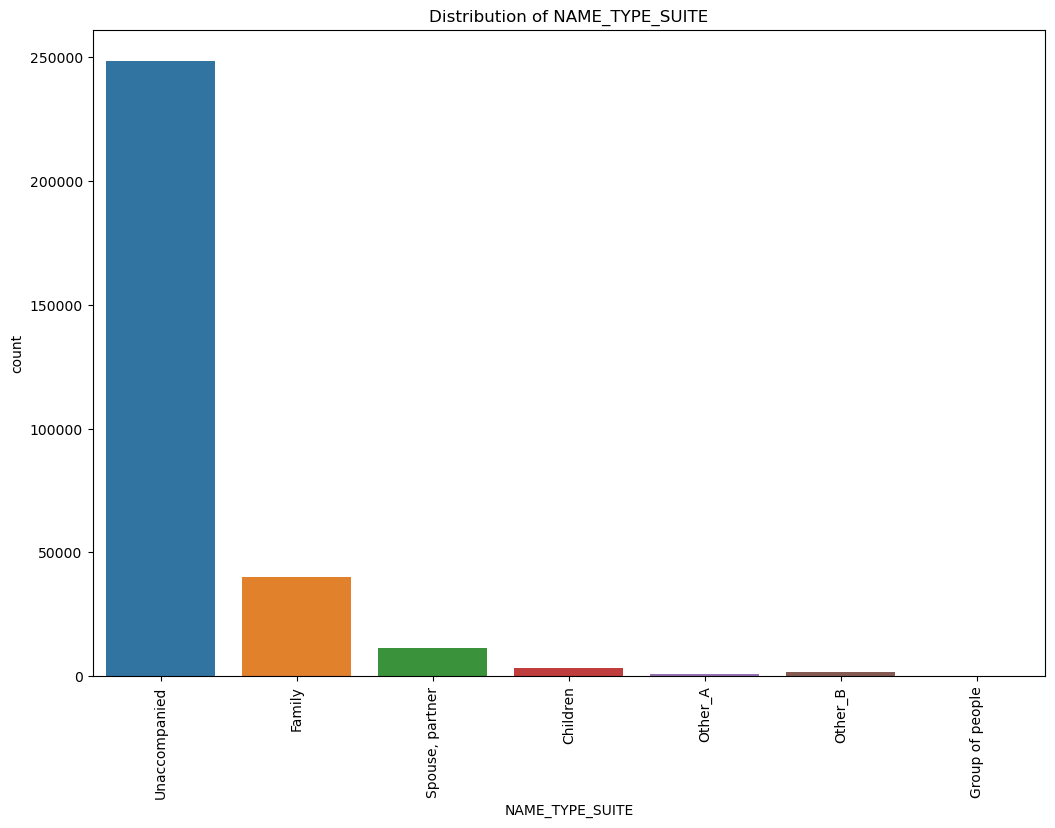

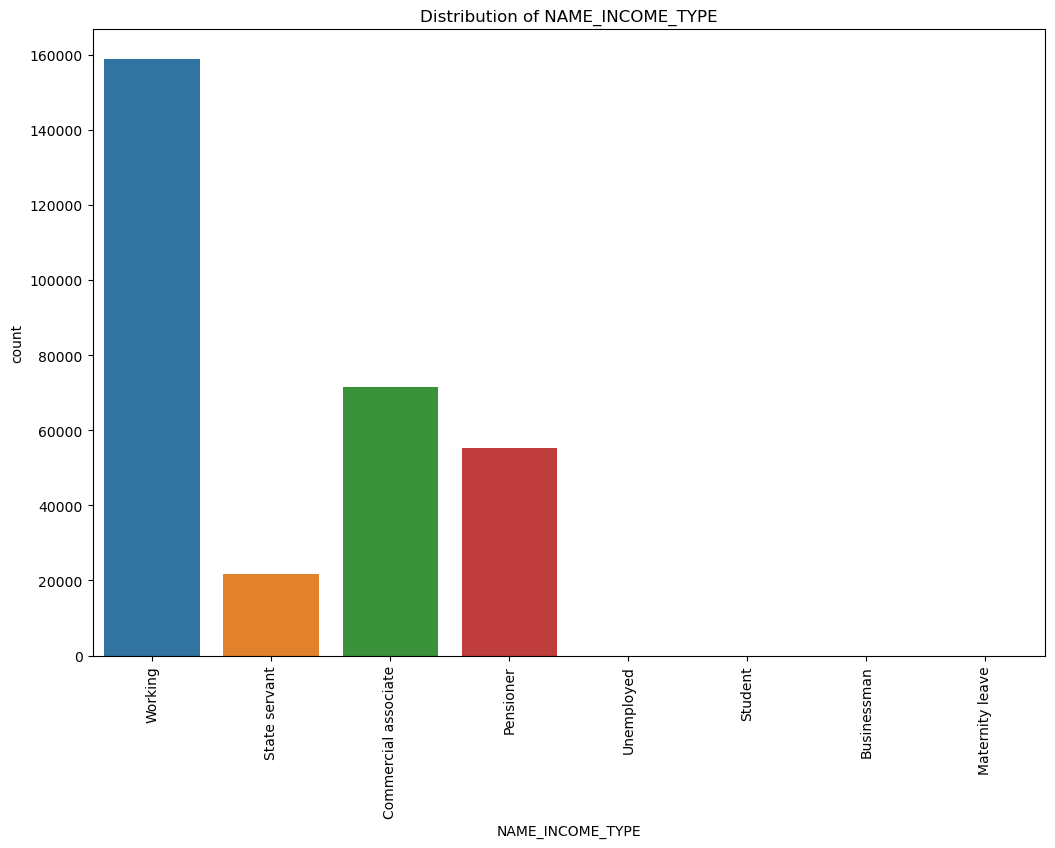

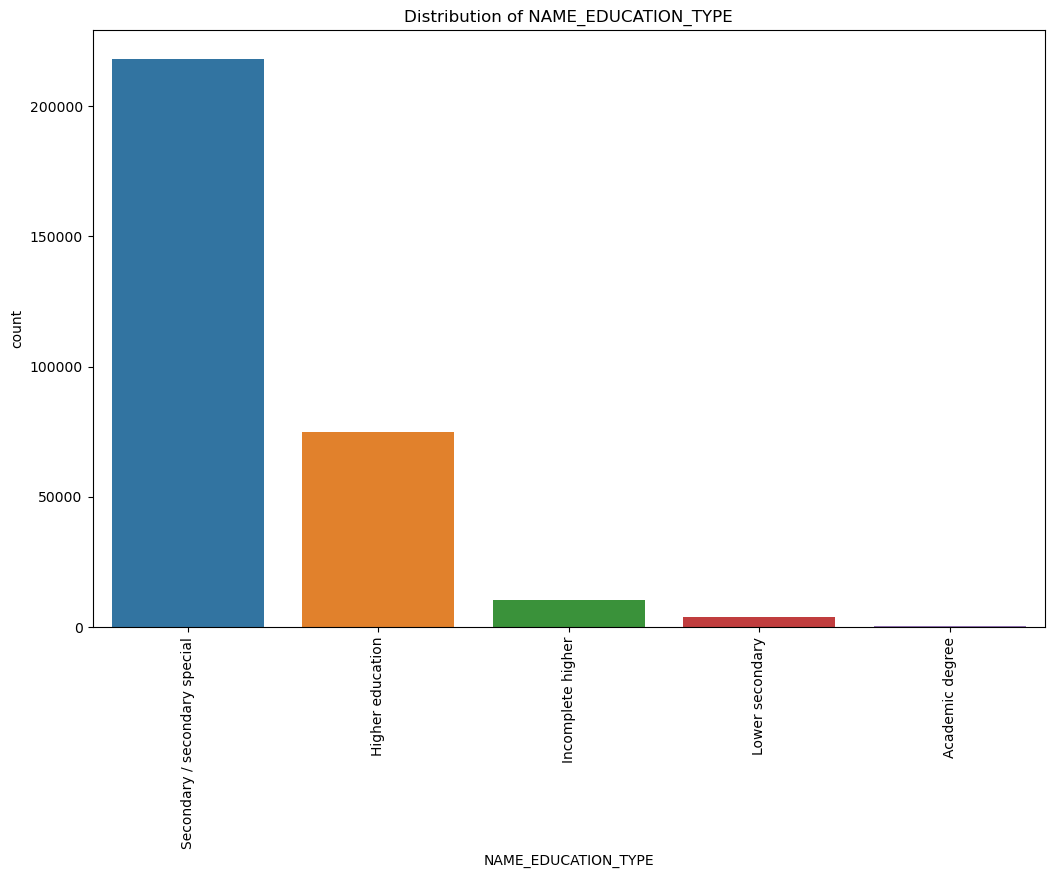

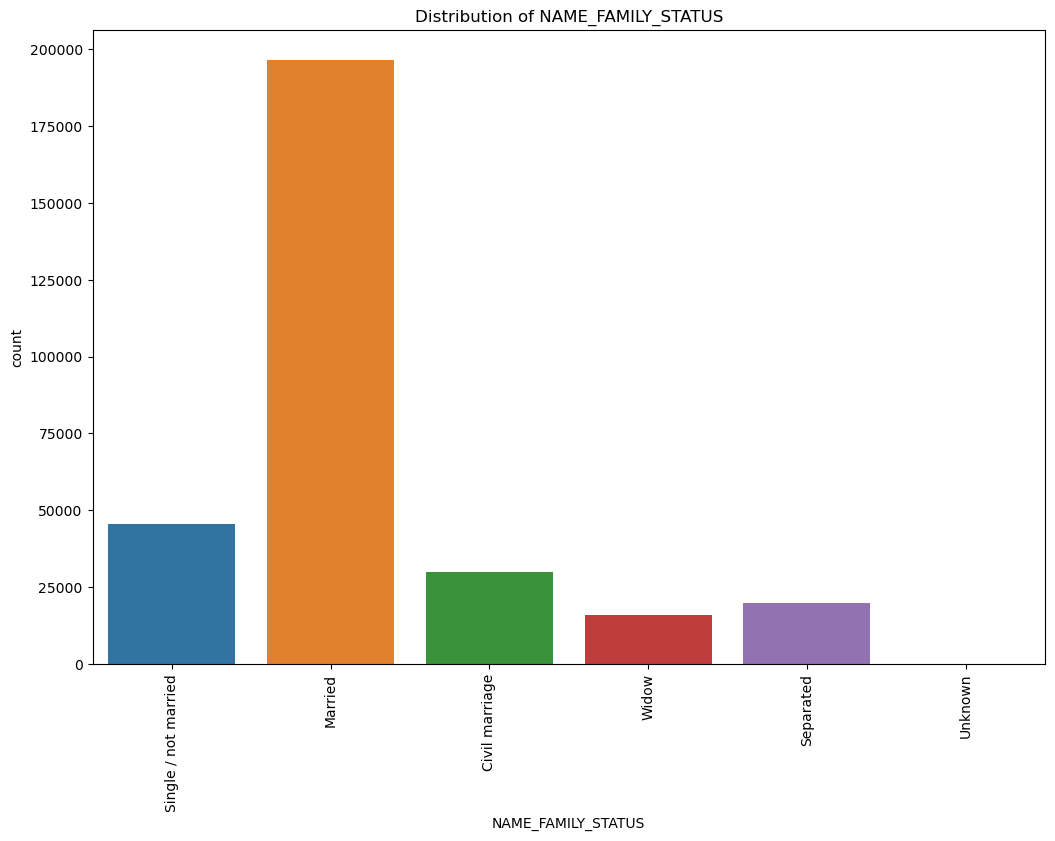

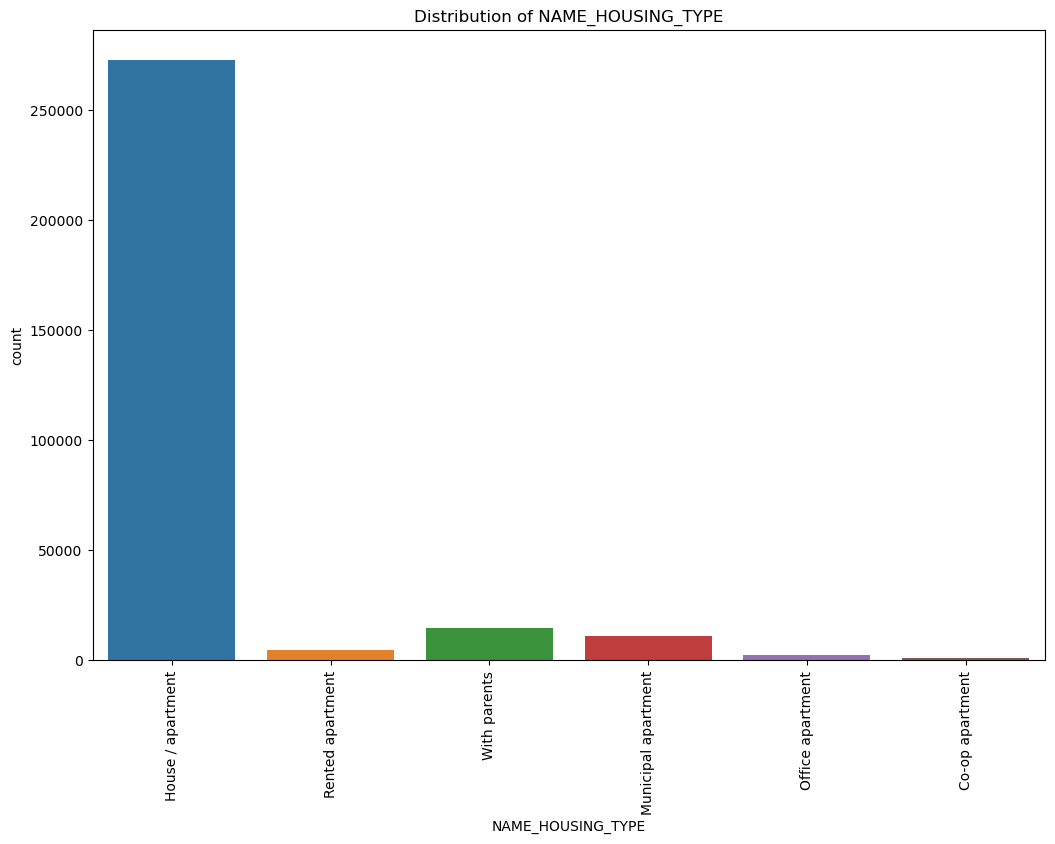

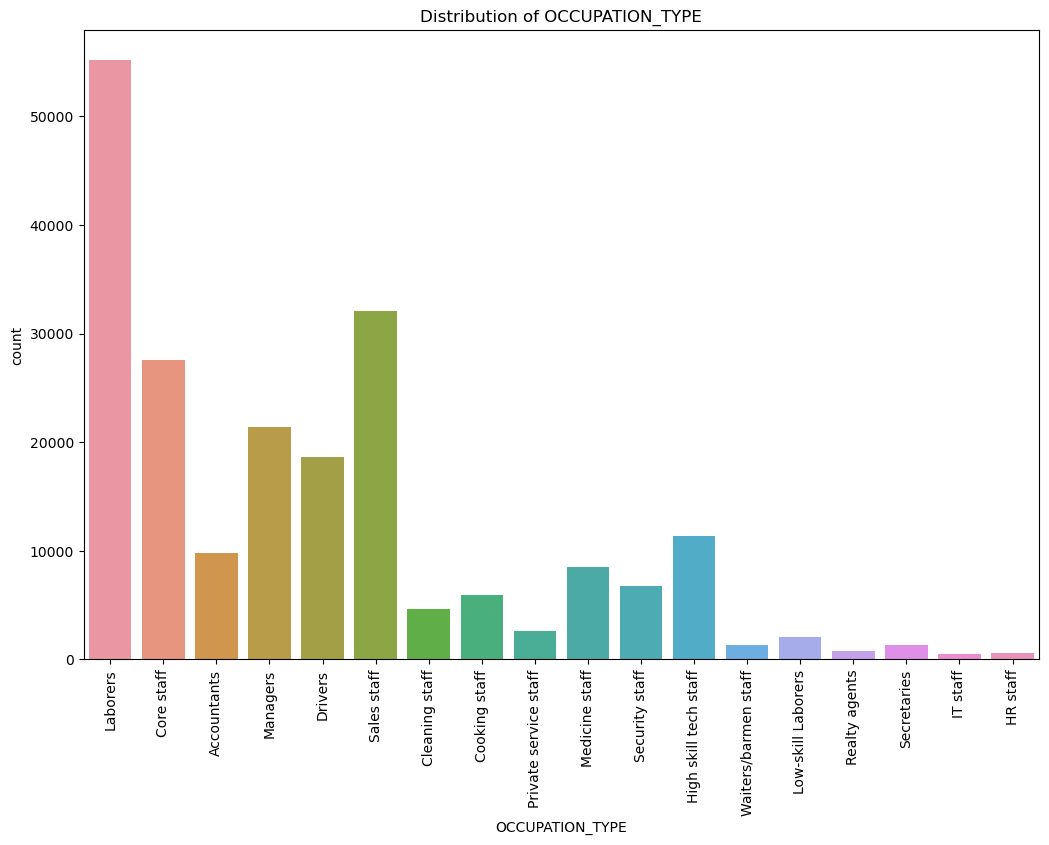

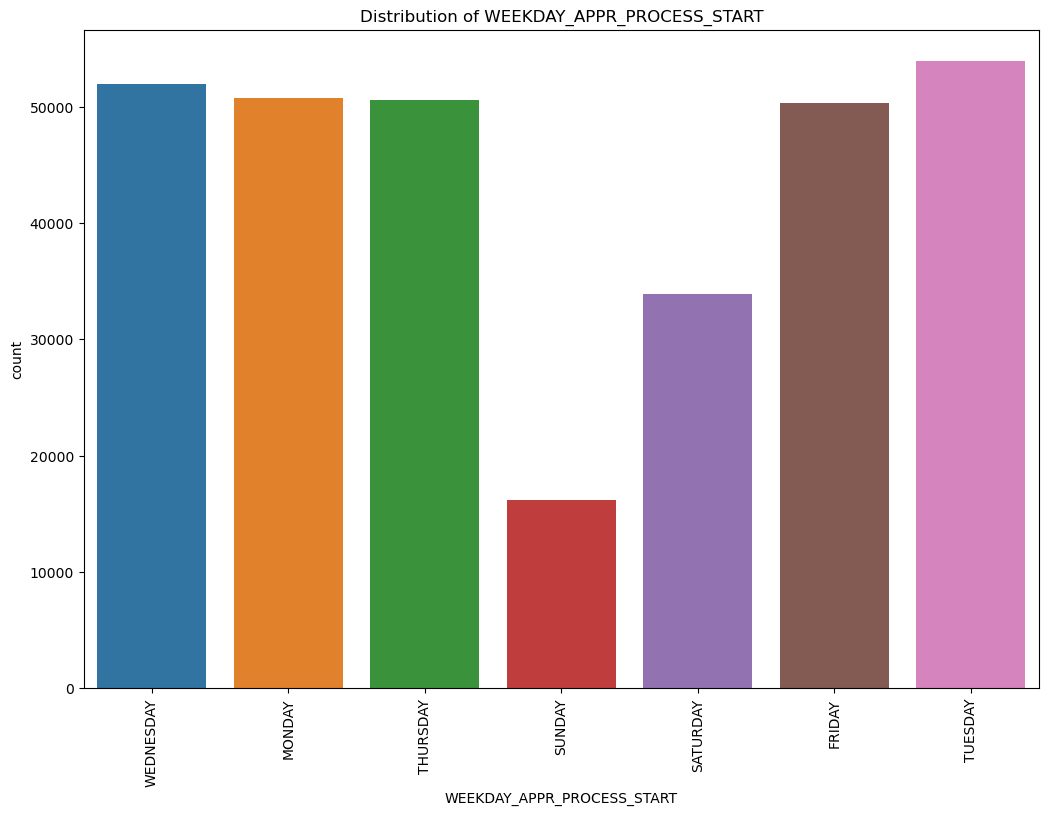

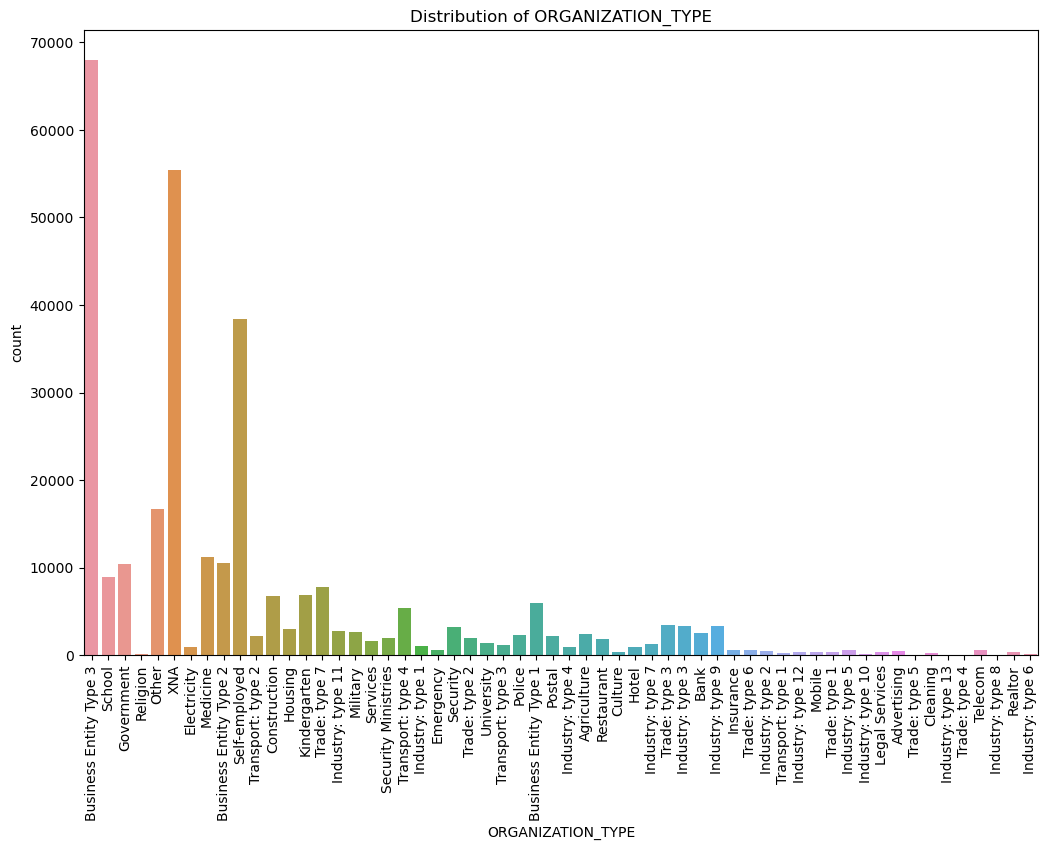

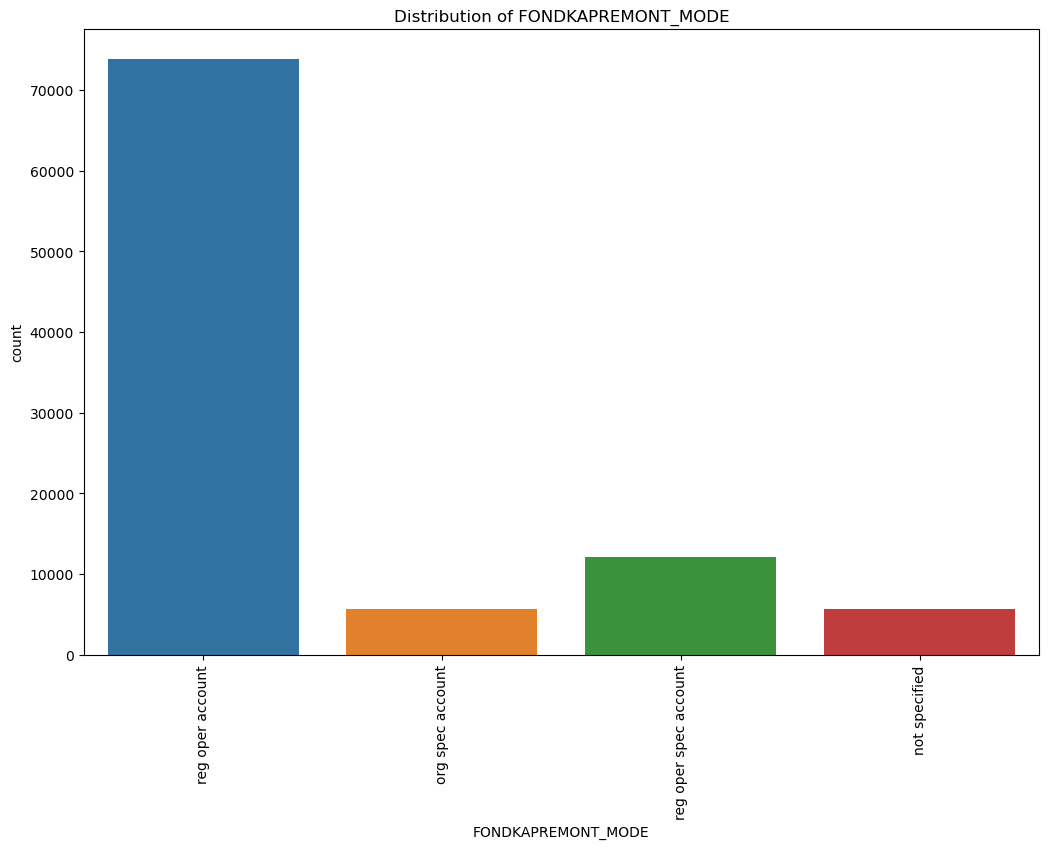

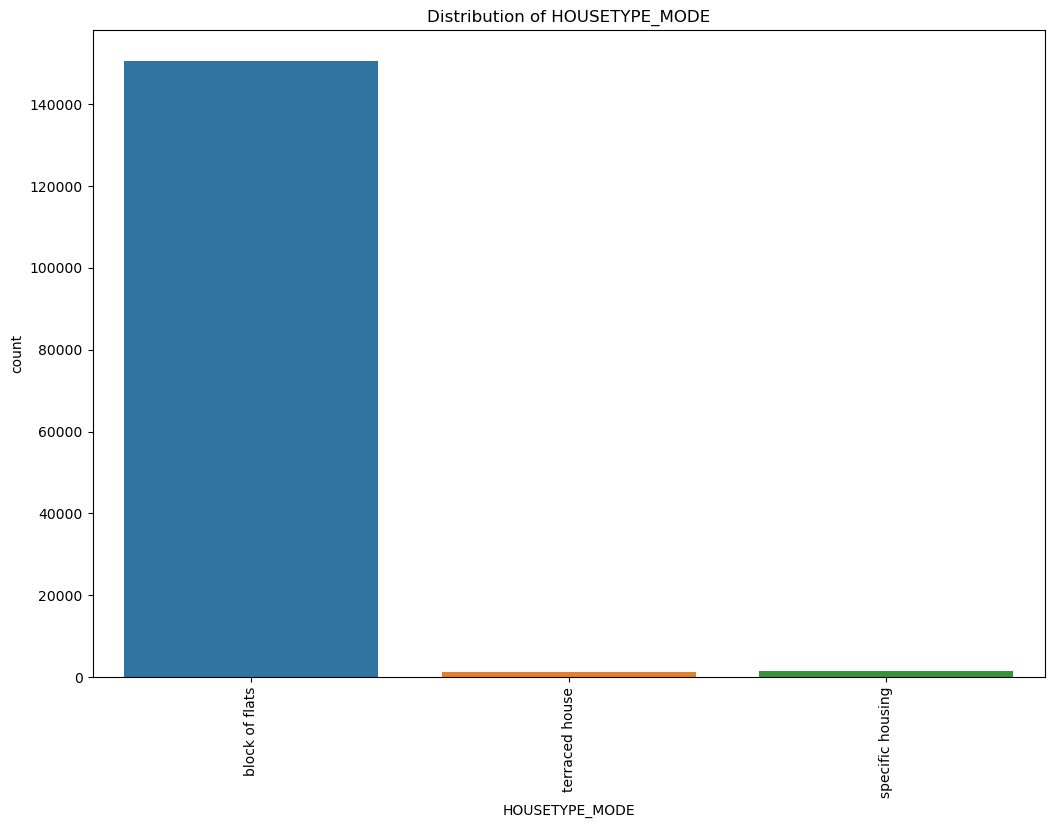

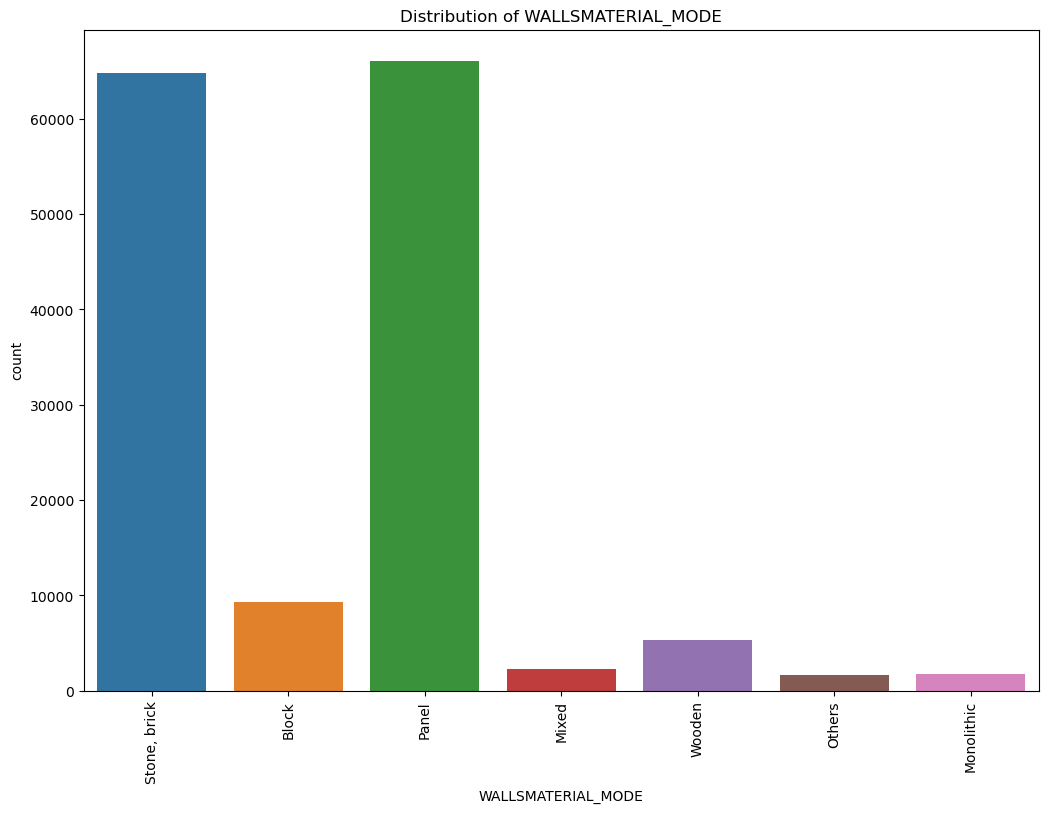

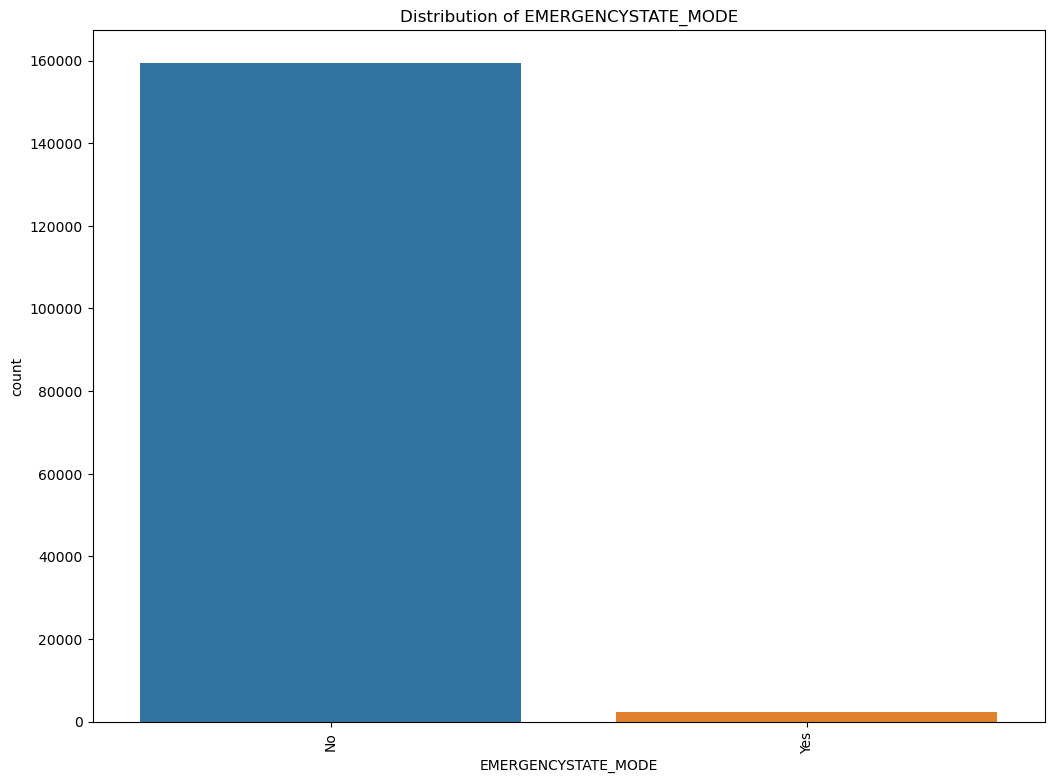

In [523]:
# Plot distribution on categorical columns
# Select categorical columns
cat_cols = application_train_df.select_dtypes(include=['object']).columns

# Define batch size for better visualization
batch_size = 1
num_batches = int(np.ceil(len(cat_cols) / batch_size))

# Plot in smaller groups
for i in range(num_batches):
    batch_cols = cat_cols[i * batch_size:(i + 1) * batch_size]
    
    # Plot each categorical column
    plt.figure(figsize=(30, 15))
    for j, col in enumerate(batch_cols, 1):
        plt.subplot(2, 3, j)  # Adjust rows and columns based on your batch size
        sns.countplot(data=application_train_df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    
    plt.tight_layout()
    plt.show()


Most of applicants apply for cash loans and the largest type of housing is house/apartment. Interestingly, the number of people within business entity type 3 applying for loans amounts to nearly 70,000, far more than other type of organization.

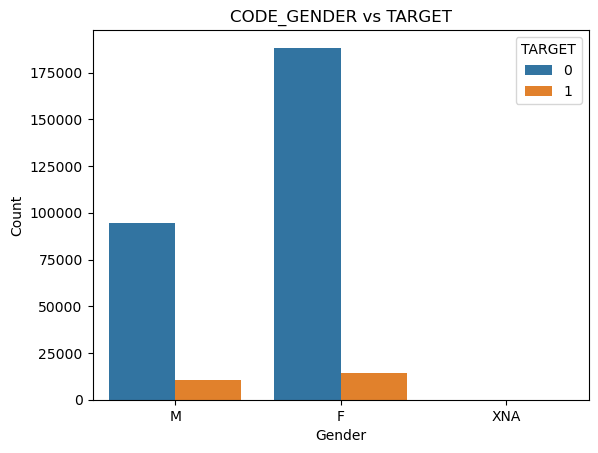

In [525]:
# Count plot for CODE_GENDER vs TARGET
sns.countplot(x='CODE_GENDER', hue='TARGET', data=application_train_df)
plt.title('CODE_GENDER vs TARGET')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Interestingly, male has a higher proportion of defaulting on loan than women

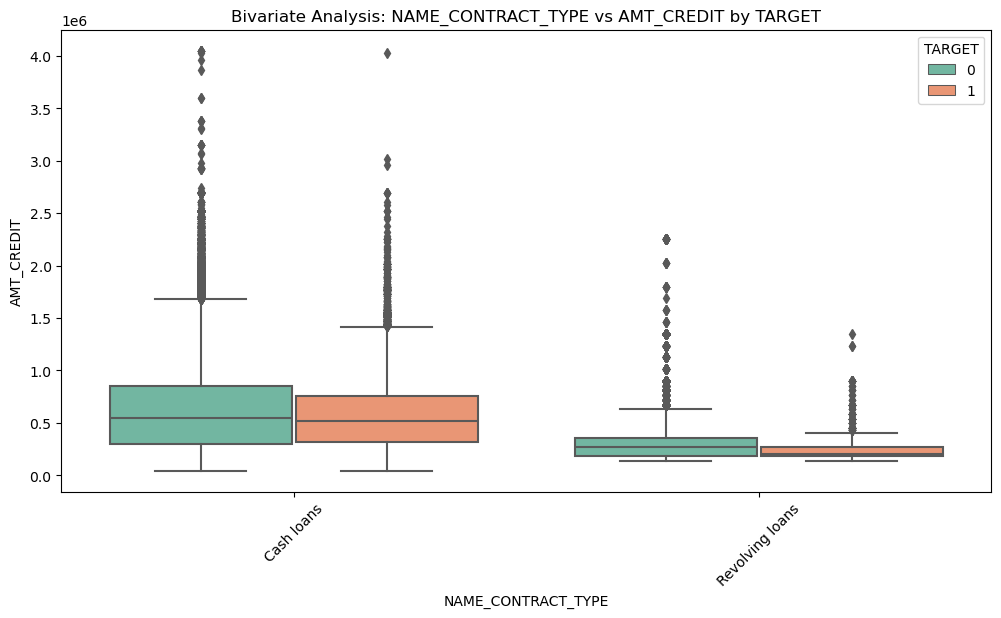

In [528]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a box plot with 'TARGET' as hue to separate the data
sns.boxplot(data=application_train_df, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', hue='TARGET', palette='Set2')

# Add title and labels
plt.title('Bivariate Analysis: NAME_CONTRACT_TYPE vs AMT_CREDIT by TARGET')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('AMT_CREDIT')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The credit amount of loan for cash loans is much higher than revolving loans. Also, the non-defaulters usually borrow more than the defaulters.

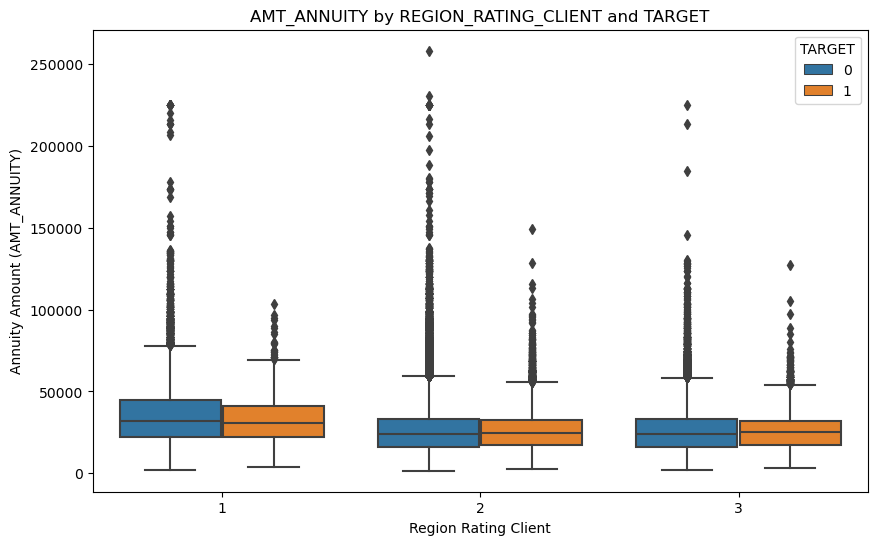

In [530]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot for AMT_ANNUITY based on REGION_RATING_CLIENT and TARGET
sns.boxplot(data=application_train_df, x='REGION_RATING_CLIENT', y='AMT_ANNUITY', hue='TARGET')

# Set the labels and title
plt.title('AMT_ANNUITY by REGION_RATING_CLIENT and TARGET')
plt.xlabel('Region Rating Client')
plt.ylabel('Annuity Amount (AMT_ANNUITY)')

# Display the plot
plt.show()

The loan annuity is generally higher in those region rating = 1. 

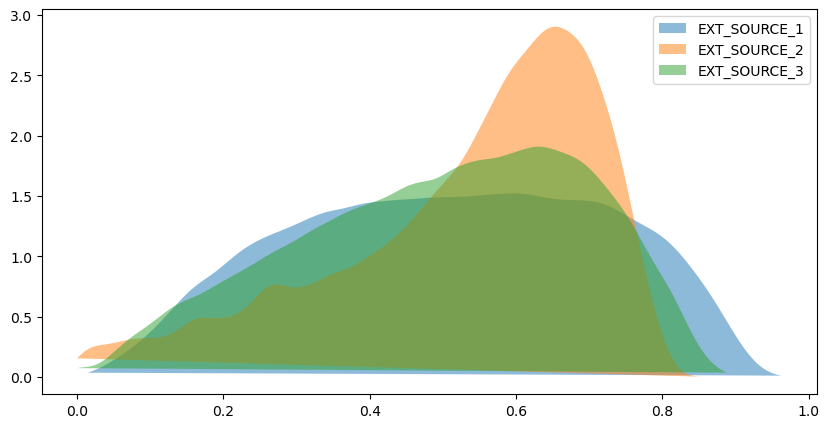

In [533]:
#Plotting the variation in the normalised credit score
from scipy.stats import gaussian_kde

# Replacing inf values with NaN
df_clean = application_train_df.copy()
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values before plotting
df_clean.dropna(subset=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace=True)

# Plot using Scipy's gaussian_kde for the density plot
plt.figure(figsize=(10, 5))

# Create the KDE for each EXT_SOURCE column
for column in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    data = df_clean[column].dropna()
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 1000)
    y_vals = kde(x_vals)
    plt.fill(x_vals, y_vals, label=column, alpha=0.5)

# Add legend and show the plot
plt.legend()
plt.show()


From the plot, it is seen that, 
EXT_SOURCE_2 has a concentrated distribution with a peak of 0.6, suggesting that this score is generally higher and less spread out compared to the other two sources which means it probably has more null values

## **6. Data Cleaning**
###  **a. Data Cleaning on application_train dataset**
####  **1. Evaluating columns with missing values**

In [536]:
# Convert and factorize CAR_AGE_BIN

In [542]:
# Convert OWN_CAR_AGE to float32 to avoid float16 issues
application_train_df["OWN_CAR_AGE"] = application_train_df["OWN_CAR_AGE"].astype("float32")

# Apply pd.cut() after ensuring the correct dtype
# Apply pd.cut(), making a new feature
application_train_df["CAR_AGE_BIN"] = pd.cut(application_train_df["OWN_CAR_AGE"], 
                             labels=["new", "old", "quite old", "very old"], 
                             bins=[0, application_train_df["OWN_CAR_AGE"].quantile(0.25), 
                                   application_train_df["OWN_CAR_AGE"].median(), 
                                   application_train_df["OWN_CAR_AGE"].quantile(0.75), 
                                   application_train_df["OWN_CAR_AGE"].max()])

# For rows that were originally missing, assign 'none' explicitly
application_train_df["CAR_AGE_BIN"] = application_train_df["CAR_AGE_BIN"].cat.add_categories("none")  # Add "none" as a category
application_train_df["CAR_AGE_BIN"] = application_train_df["CAR_AGE_BIN"].fillna("none")  

# Show the result
print(application_train_df[['OWN_CAR_AGE', 'CAR_AGE_BIN']])

# factorize
application_train_df['CAR_AGE_BIN'] = pd.Categorical(application_train_df['CAR_AGE_BIN'], categories=["none", "very old", "quite old", "old", "new"], \
                                               ordered=True) #order of value matter
print(application_train_df['CAR_AGE_BIN'])

application_train_df["CAR_AGE_BIN_Factorized"], _ = pd.factorize(application_train_df["CAR_AGE_BIN"])
application_train_df.drop(columns=["CAR_AGE_BIN"], inplace=True)

        OWN_CAR_AGE CAR_AGE_BIN
0               NaN        none
1               NaN        none
2              26.0    very old
3               NaN        none
4               NaN        none
...             ...         ...
307506          NaN        none
307507          NaN        none
307508          NaN        none
307509          NaN        none
307510          NaN        none

[307511 rows x 2 columns]
0             none
1             none
2         very old
3             none
4             none
            ...   
307506        none
307507        none
307508        none
307509        none
307510        none
Name: CAR_AGE_BIN, Length: 307511, dtype: category
Categories (5, object): ['none' < 'very old' < 'quite old' < 'old' < 'new']


In [543]:
#Change the missing occupations to others
application_train_df["OCCUPATION_TYPE"] = application_train_df["OCCUPATION_TYPE"].fillna("Others")

#Get the count for each occupations
application_train_df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [544]:
# filtering the data that has missing values > 65%
def dropna_over65(df):
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (missing_values / len(df) * 100)

    missing_data_over_65 = missing_percent[missing_percent > 65]
    print(f'There are: {len(missing_data_over_65)} columns missing data over 65%')
    print(missing_data_over_65)

#dropping columns that have more than 65% null values
    df.drop(columns = missing_data_over_65.index, inplace=True)
    print('\n')
    print(f'Shape of the df after removing missing data over 65% : {df.shape}')
    
    return df  

In [545]:
### **b. Factorize all Categorical Columns 

Since 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' seem like important columns, we will first bin the values and factorise these particular columns first.

In [547]:
def factorize_application(df):
    bins = [0, 0.3, 0.6, 0.8, 1.0]
    labels = ['Very Poor', 'Average', 'Good', 'Excellent']

    # Replacing NaN values with 0
    for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
        df[col] = df[col].fillna(0).astype('float32')  
    
    # Binning and creating new category columns
    for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
        df[col + '_Category'] = pd.cut(df[col], bins=bins, labels=labels, right=False)
    
    # Dropping original EXT_SOURCE columns
    df.drop(columns=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace = True)
    
    # Factorizing the category columns
    for col in ['EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']:
        df[col] = pd.factorize(df[col])[0]

    print(f"Factorized Columns: {['EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']}")
    return df



In [561]:
factorize_application(application_train_df)

Factorized Columns: ['EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000,0.025208,0.038300,0.972168,0.634277,0.014397,0.000000,0.068970,0.083313,0.125000,0.037689,0.022003,0.019806,0.0,0.000000,0.024994,0.036896,0.972168,0.624512,0.014397,0.000000,0.068970,0.083313,0.125000,0.037506,0.020493,0.019302,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804,0.092407,0.053802,0.984863,0.804199,0.049713,0.080627,0.034485,0.291748,0.333252,0.012802,0.078979,0.055389,0.0,0.000000,0.096802,0.052887,0.984863,0.798828,0.060791,0.080017,0.034485,0.291748,0.333252,0.013199,0.078674,0.055786,0.003901,0.010002,reg oper account,block of flats,0.071411,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,

The rest of the categorical columns are factorized here.
the labelEncode will detect columns with binary categories are factorize accordingly whereas the OneHotEncoder, will factorize columns with more than two uniq columns. Below is the function for that.

In [564]:
def factorize_cat_cols(df):
    
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = pd.factorize(df[col])[0]
    return df

#### 2. Evaluating highly-correlated columns
Remove highly-correlated numerical variables with greater than 0.8 correlation score using correlation matrix
Remove highly-correlated categorical variables and other irrelevant columns using domain knowledge

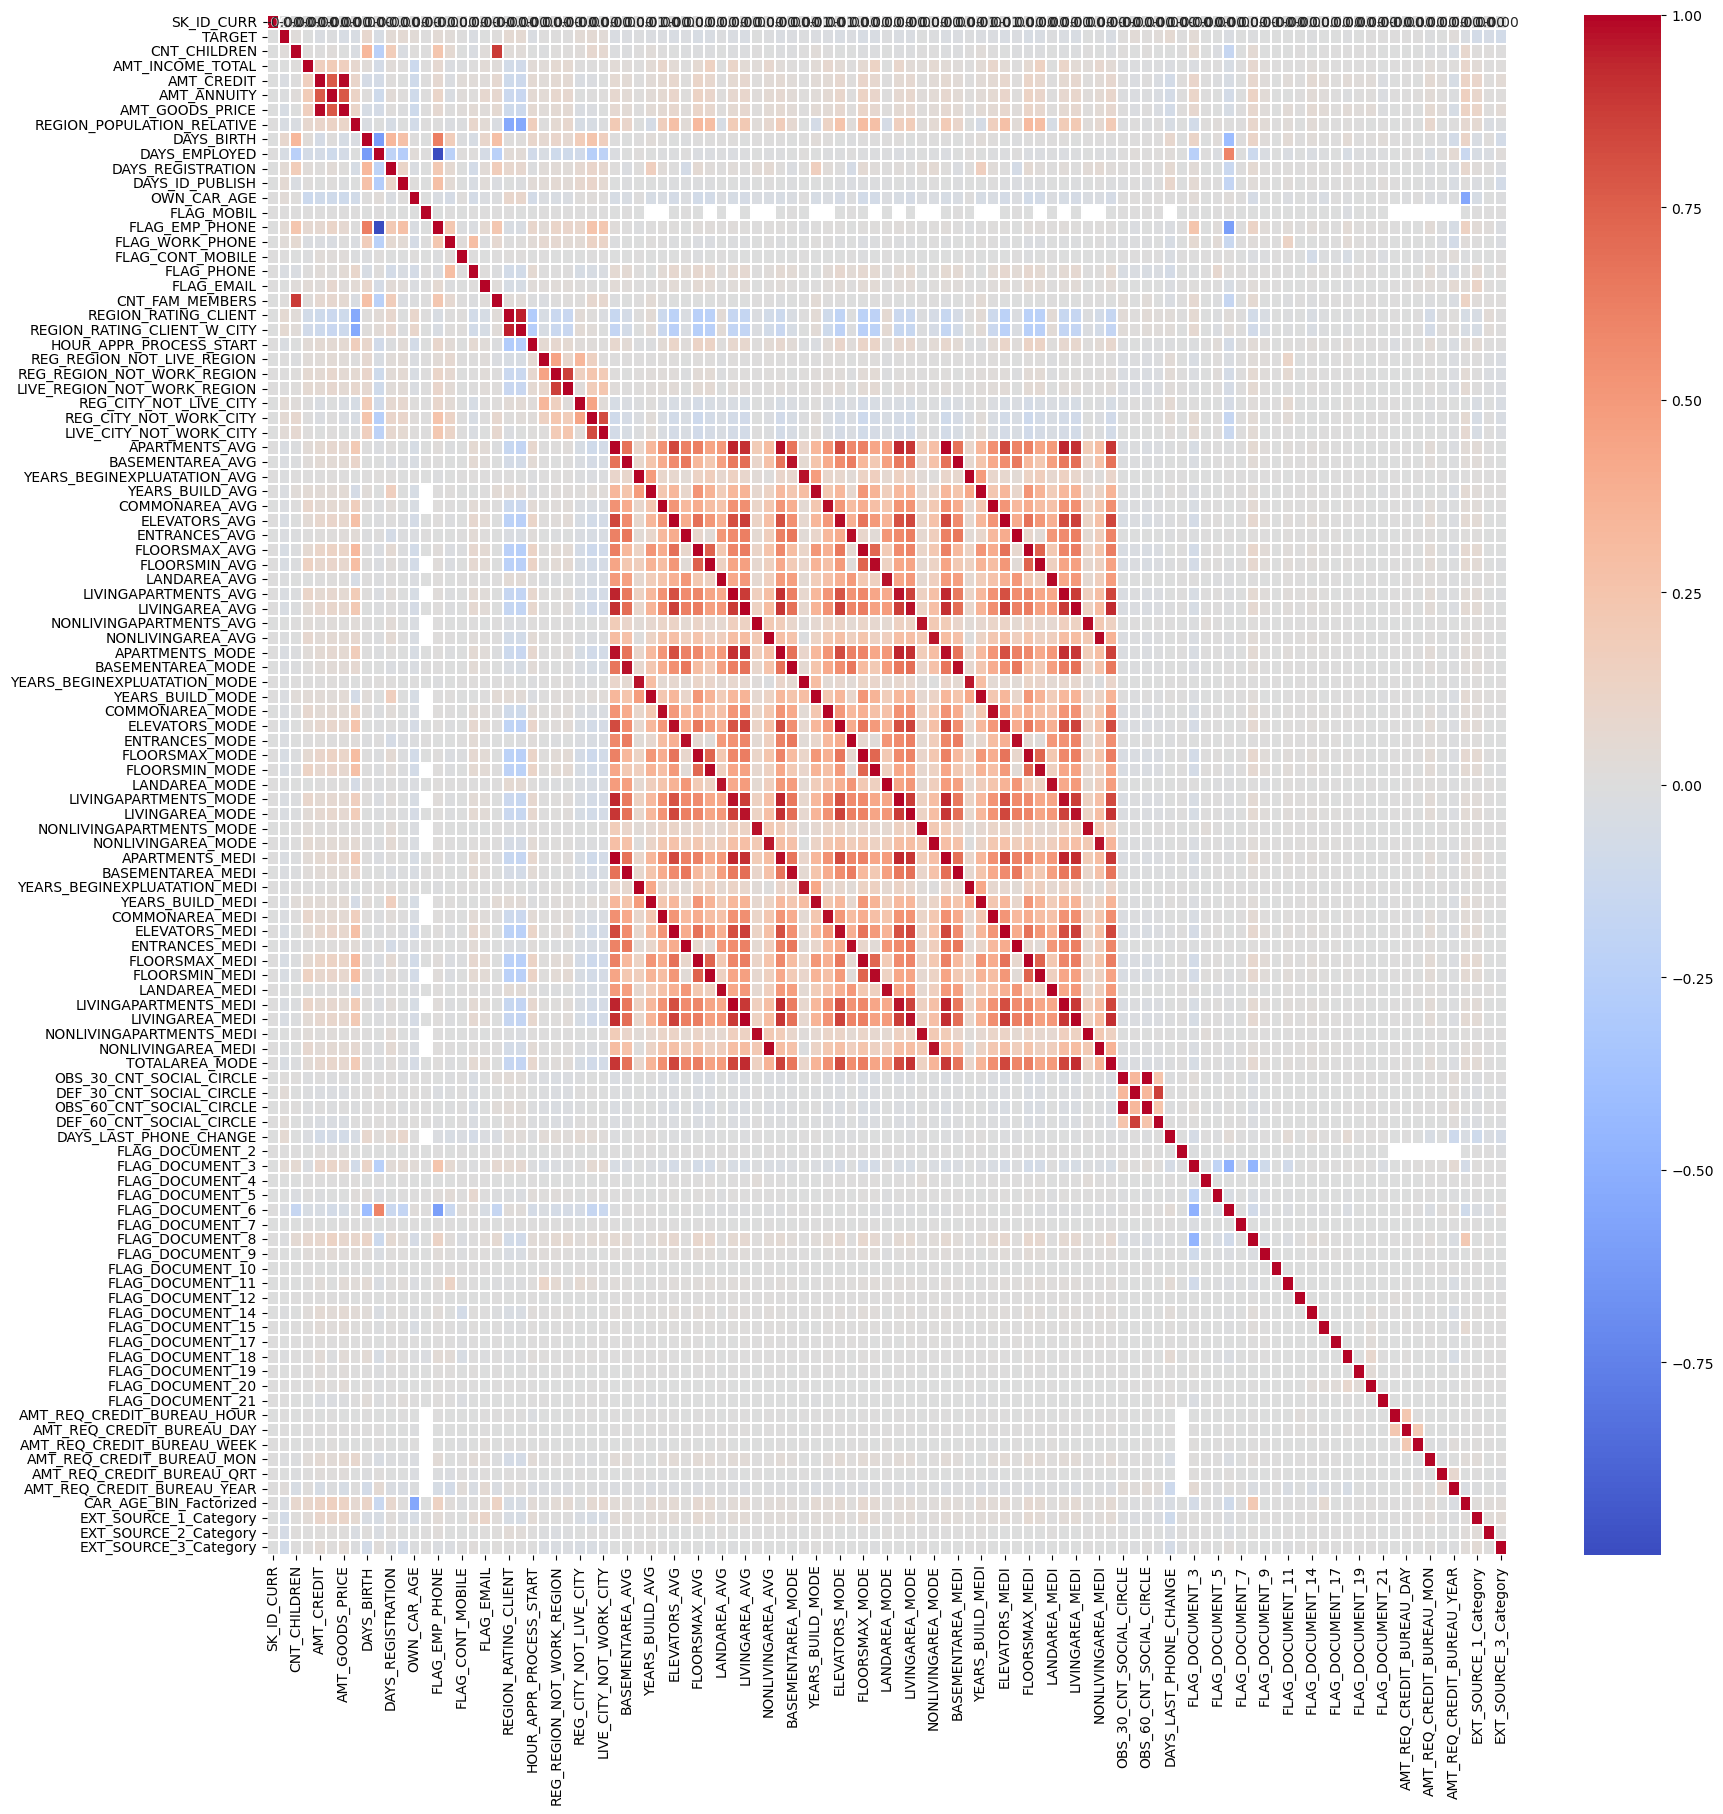

In [567]:
# Step 1: Select only numeric columns
numeric_columns = application_train_df.select_dtypes(include=['number']).columns

# Step 2: Compute the correlation matrix for numeric columns
correlation_matrix = application_train_df[numeric_columns].corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths = 0.2)
plt.show()

In [580]:
# Drop highly-correlated numerical variables
# Identify pairs of features with correlation above a threshold
def redundant_data(df):
    threshold = 0.8
    to_drop = []  # List to store columns to drop

# Looping through the correlation matrix to find highly correlated pairs
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                if colname not in to_drop:
                    to_drop.append(colname)

# Drop one column from each highly correlated pair
    to_drop = list(set(to_drop) & set(df.columns))

    # Drop columns
    df.drop(columns=to_drop, inplace=True)
    print(f"Dropped {len(to_drop)} redundant columns")
    print(f"The columns names that were dropped are :{to_drop}")
    print('\n')
    print(f"Shape of the dataset after removing multicolinearitly: {df.shape}")

    return df

### ** c. Imputing NA values in the Remaining Columns**
For all numeric columns the na values will be replaced with the median of the column 
for all categorical columns that were factorised, the na values will be replaced with the mode of the column

In [583]:
def imputing_na(df):
    for col in df.columns:
        if not df[col].dtype == 'number':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    print("Imputed all na values")
    return df


In [585]:
## cleaned dataset

In [587]:
#calling all the functions for data clening
application_clean_df = application_train_df.copy()
dropna_over65(application_clean_df)

factorize_cat_cols(application_clean_df)
print(application_clean_df.shape)

imputing_na(application_clean_df)
print(application_clean_df.shape)

redundant_data(application_clean_df)
print(application_clean_df.shape)


There are: 17 columns missing data over 65%
COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
FLOORSMIN_MEDI              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
OWN_CAR_AGE                 65.990810
dtype: float64


Shape of the df after removing missing data over 65% : (307511, 104)
(307511, 104)
Imputed all na values
(307511, 104)
Dropped 29 redundant columns
The columns names that were dropped are :['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'APARTMENTS_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YE

In [588]:
application_clean_df.isna().sum()


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_YEAR    0
CAR_AGE_BIN_Factorized        0
EXT_SOURCE_1_Category         0
EXT_SOURCE_2_Category         0
EXT_SOURCE_3_Category         0
Length: 75, dtype: int64

In [591]:
application_clean_df['CAR_AGE_BIN_Factorized'].isna().sum()

0

In [593]:
application_clean_df.isna().sum().sum()

0

In [595]:
application_clean_df.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.0,307511.000000,307511.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.0,307511.0,307511.0,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.658370,0.340108,0.306327,0.417052,1.687979e+05,5.990259e+05,27107.863281,0.277512,1.077347,0.349649,1.246577,0.273772,0.000000,-16036.995067,63815.045904,NaN,-2994.202373,0.999997,0.199368,0.998133,0.281066,0.056720,4.163802,2.052463,2.96231,12.063419,0.015144,0.050769,0.078173,0.230454,9.546556,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,-0.488070,0.104474,-0.466413,NaN,0.000000,NaN,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.002936,0.00121,0.000267,0.008130,0.000595,0.000507,0.000335,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.842412,0.540381,1.244089,1.090163
std,102790.175348,0.272419,0.293509,0.474284,0.473746,0.460968,0.722121,2.371759e+05,4.024795e+05,14493.361328,0.722458,1.210927,0.612447,0.985796,0.829839,0.013824,4363.988632,141275.766519,NaN,1509.450419,0.001803,0.399526,0.043164,0.449521,0.231307,3.466534,0.509034,2.16452,3.265832,0.122126,0.219526,0.268444,0.421124,10.846045,0.078003,0.068665,0.000000,0.070801,0.106750,0.061127,0.048615,0.535714,1.439853,0.513823,NaN,0.446045,NaN,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.054110,0.03476,0.016327,0.089798,0.024387,0.022518,0.018299,0.078125,0.103027,0.190796,0.0,NaN,0.0,1.356541,0.841623,0.726447,0.897795
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000290,-25229.000000,-17912.000000,-24672.0,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [596]:
application_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int32  
 1   TARGET                       307511 non-null  int8   
 2   NAME_CONTRACT_TYPE           307511 non-null  int64  
 3   CODE_GENDER                  307511 non-null  int64  
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int8   
 7   AMT_INCOME_TOTAL             307511 non-null  float32
 8   AMT_CREDIT                   307511 non-null  float32
 9   AMT_ANNUITY                  307511 non-null  float32
 10  NAME_TYPE_SUITE              307511 non-null  int64  
 11  NAME_INCOME_TYPE             307511 non-null  int64  
 12  NAME_EDUCATION_TYPE          307511 non-null  int64  
 13 

In [599]:
# Drop columns whose name contains 'FLAG_DOCUMENT'
application_clean_df = application_clean_df.loc[:, ~application_clean_df.columns.str.contains('FLAG_DOCUMENT')]

columns_to_drop = [
    'NAME_TYPE_SUITE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'YEARS_BUILD_AVG', 
    'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
    'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 
    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 
    'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DAYS_LAST_PHONE_CHANGE', 'REG_REGION_NOT_LIVE_REGION'
]

# Drop unwanted columns from the DataFrame
application_clean_final = application_clean_df.drop(columns=columns_to_drop, errors='ignore')

# Show the updated DataFrame
application_clean_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int32  
 1   TARGET                      307511 non-null  int8   
 2   NAME_CONTRACT_TYPE          307511 non-null  int64  
 3   CODE_GENDER                 307511 non-null  int64  
 4   FLAG_OWN_CAR                307511 non-null  int64  
 5   FLAG_OWN_REALTY             307511 non-null  int64  
 6   CNT_CHILDREN                307511 non-null  int8   
 7   AMT_INCOME_TOTAL            307511 non-null  float32
 8   AMT_CREDIT                  307511 non-null  float32
 9   AMT_ANNUITY                 307511 non-null  float32
 10  NAME_INCOME_TYPE            307511 non-null  int64  
 11  NAME_EDUCATION_TYPE         307511 non-null  int64  
 12  NAME_FAMILY_STATUS          307511 non-null  int64  
 13  NAME_HOUSING_T

In [601]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Now, you can view the DataFrame with all columns
application_clean_final.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,0,0,0,0,0.018799,-9461,-637,-3648.0,-2120,1,1,0,0,2,0,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1,1,1,0,0.003542,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,0,0,0,0,0.010033,-19046,-225,-4260.0,-2531,1,1,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2,1
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,0,0,2,0,0.008018,-19005,-3039,-9832.0,-2437,1,1,0,0,2,0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,0,0,0,0,0.028656,-19932,-3038,-4312.0,-3458,1,1,0,1,2,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0


In [603]:
# Reset the display option to the default
pd.reset_option('display.max_columns')

## 7. **Scaling Data**
Logistic Regression and most ML models perform better on scaled data because they are sensitive to feature magnitudes.

In [606]:
# scale data
from sklearn.preprocessing import StandardScaler

# List of columns to exclude from standardization
exclude_columns = ['TARGET',
    'CAR_AGE_BIN_Factorized', 'EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 
    'EXT_SOURCE_3_Category', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 
    'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE'
]

# Exclude the specified columns from the numeric columns
columns_to_standardize = [col for col in application_clean_final.columns if col not in exclude_columns]

# Print the columns to standardize
print("Columns to standardize:", columns_to_standardize)

# Apply standardization using StandardScaler
scaler = StandardScaler()
application_clean_final[columns_to_standardize] = scaler.fit_transform(application_clean_final[columns_to_standardize])

# Verify the changes
application_clean_final.head()

Columns to standardize: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BIN_Factorized,EXT_SOURCE_1_Category,EXT_SOURCE_2_Category,EXT_SOURCE_3_Category
0,100002,1,0,0,0,0,-0.577538,0.142129,-0.478095,-0.166096,...,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.346719,0,0,0,0
1,100003,0,0,1,0,1,-0.577538,0.426792,1.725450,0.592708,...,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565,0,1,1,0
2,100004,0,1,0,1,0,-0.577538,-0.427196,-1.152888,-1.404584,...,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565,1,0,2,1
3,100006,0,0,1,0,0,-0.577538,-0.142533,-0.711430,0.177912,...,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565,0,0,1,0
4,100007,0,0,0,0,0,-0.577538,-0.199466,-0.213734,-0.361695,...,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565,0,0,2,0


In [608]:
# split data to train and test

from sklearn.model_selection import train_test_split

# Drop the 'SK_ID_CURR' column and separate the target variable (TARGET)
X = application_clean_final.drop(columns=['SK_ID_CURR', 'TARGET'])
y = application_clean_final['TARGET']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (246008, 36)
Test set shape: (61503, 36)


## 8. **2. Handle Class Imbalance**
Imbalance skews the model towards the majority class, making it harder to predict defaults (1s).

In [611]:
### downsample
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply the undersampling to the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Verify the class distribution after downsampling
print("Class distribution in the resampled training set:")
print(y_train_resampled.value_counts())

# Check the new shape of the training set
print(f"Resampled training set shape: {X_train_resampled.shape}")

Class distribution in the resampled training set:
TARGET
0    19876
1    19876
Name: count, dtype: int64
Resampled training set shape: (39752, 36)


## 9.**Feature Selection (Top Predictors)**
Helps reduce dimensionality and removes noisy features before final model training.

In [614]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Function to perform RFE and return selected features
def imp_features(X_train, X_test, y_train, num_features=10):
    # Ensure SK_ID_CURR is kept separately if present
    X_train_id, X_test_id = None, None
    if 'SK_ID_CURR' in X_train:
        X_train_id, X_test_id = X_train[['SK_ID_CURR']], X_test[['SK_ID_CURR']]
        X_train, X_test = X_train.drop(columns=['SK_ID_CURR']), X_test.drop(columns=['SK_ID_CURR'])

    # Apply Recursive Feature Elimination (RFE)
    log_model = LogisticRegression(max_iter=1000)
    selector = RFE(log_model, n_features_to_select=num_features)
    selector.fit(X_train, y_train)

    # Get the selected feature names
    selected_cols = list(X_train.columns[selector.support_])

    print(f"Selected Features: {selected_cols}")

    # Restore SK_ID_CURR if it was present
    if X_train_id is not None:
        X_train, X_test = pd.concat([X_train_id, X_train[selected_cols]], axis=1), pd.concat([X_test_id, X_test[selected_cols]], axis=1)
    else:
        X_train, X_test = X_train[selected_cols], X_test[selected_cols]

    return X_train, X_test, y_train

# Now, let's use the imp_features function on the downsampled data
X_train_resampled_rfe, X_test_rfe, y_train_resampled = imp_features(X_train_resampled, X_test, y_train_resampled, num_features=10)

# Verify the shape of the training and test sets after feature selection
print(f"Resampled and feature-selected training set shape: {X_train_resampled_rfe.shape}")
print(f"Test set shape (unchanged): {X_test_rfe.shape}")

Selected Features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_1_Category', 'EXT_SOURCE_2_Category', 'EXT_SOURCE_3_Category']
Resampled and feature-selected training set shape: (39752, 10)
Test set shape (unchanged): (61503, 10)


In [615]:
df = application_clean_df.copy()  # Your Dataset
target = 'TARGET'  # Your Target Column Name

# 1. Scale Data
X_train, X_test, y_train, y_test = scale_df(df,target)

# 2. Fix Class Imbalance
X_train, y_train = under_sample(X_train, y_train)

# 3. Feature Selection
X_train, X_test, y_train = imp_features(X_train, X_test, y_train)

print(f"Final X_train Shape: {X_train.shape}")
print(f"Final X_test Shape: {X_test.shape}")

Data Scaling Done
Class Imbalance Fixed


ValueError: Input X contains NaN.
RFE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
## 10. Training The model Using various methods

In [ ]:
### a. Logistic Regression Model

In [ ]:
# log_model.fit(X_train, y_train)

In [ ]:
# # 5. Evaluate
# y_pred = log_model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [ ]:
### b. Random Classifier Model

In [ ]:
# model_RFC = RandomForestClassifier(class_weight='balanced', random_state=42)
# model_RFC.fit(X_train, y_train)

# random_predictions = np.random.choice([0, 1], size=y_test.shape[0], p=[0.7, 0.3])

# # Calculate accuracy of the random classifier
# random_accuracy = accuracy_score(y_test, random_predictions)
# print(f"Random Classifier Accuracy: {random_accuracy:.4f}")

In [ ]:
###c. KNN

In [ ]:
## 11. Cross Validation

In [ ]:
# #Creating an ROC curve
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_train, y_train_preds_proba)
# roc_auc = auc(fpr, tpr)

# plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1])
# plt.xlabel('False positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC curve')
# plt.show()

In [ ]:
### Merging other Dataframes

The bureau_df has a column named CREDIT_ACTIVE, which has records of the applicants credit history. Every applicant seems to have atleast two records of credits either active or closed. We have tried to convert these rows of data into one and merge it with the main dataset. CREDIT_ACTIVE seems to be an important column for an applicant to default, so we are merging the dataset to improve accuracy

In [ ]:
# # Converting multiple records per ID into one based on the condition
# bureau_summarised_df = bureau_df.groupby("SK_ID_CURR")["CREDIT_ACTIVE"].apply(lambda x: "Active" if "Active" in x.values else "Closed").reset_index()

# # Display the result
# print(bureau_summarised_df)